# Linear Regression

## Initialization

### Set Directory and Import Libraries

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools as it
from pathlib import Path
from statsmodels.formula.api import ols, logit # Import the ols function
from scipy.optimize import minimize # Import the minimize function
from scipy.stats import norm # Import the norm function
from scipy.stats import logistic # Import the logistic function
from statsmodels.api import qqplot # Import the qqplot function
from statsmodels.graphics.mosaicplot import mosaic # Import the mosaic function

In [3]:
# set plot style
plt.style.use('seaborn')
# set plot size
plt.rcParams['figure.figsize'] = (12, 8)

### Import data

In [4]:
data = Path('C:/Users/Abdul Rauf Maroof/OneDrive/Documents/MSBA/data_sets')
taiwan_real_estate = pd.read_csv(data/'taiwan_real_estate2.csv')
sp500 = pd.read_csv(data/'sp500_yearly_returns.csv')
ad_conversion = pd.read_csv(data/'ad_conversion.csv')
churn = pd.read_csv(data/'churn.csv')


## Data Exploration and Visualization

### Simple Linear and Logistic Regression

#### Introduction

Linear regression is a linear approach to modeling the relationship between a scalar response and one or more explanatory variables (also known as dependent and independent variables). The case of one explanatory variable is called simple linear regression. For more than one explanatory variable, the process is called multiple linear regression.

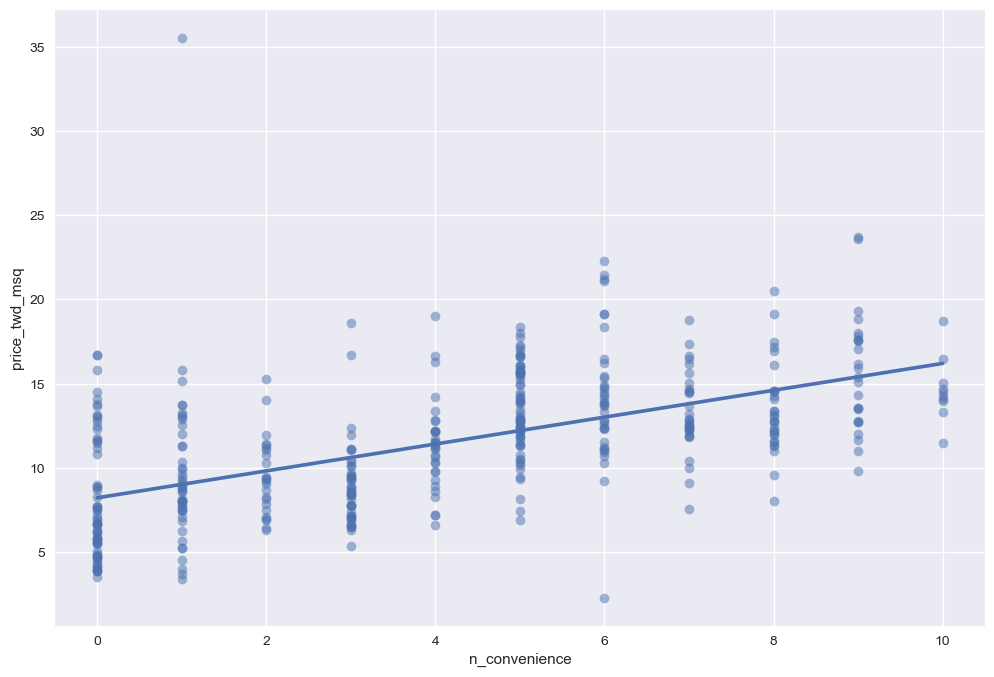

In [5]:
# Draw a trend line on the scatter plot of price_twd_msq vs. n_convenience
sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=True,
         scatter_kws={'alpha': 0.5})
plt.show()

We will now create a linear regression model to predict the price of a house based on the number of convenience stores in the area.

In [6]:
# Create the model object
mdl_price_vs_conv = ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate)
# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()
# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


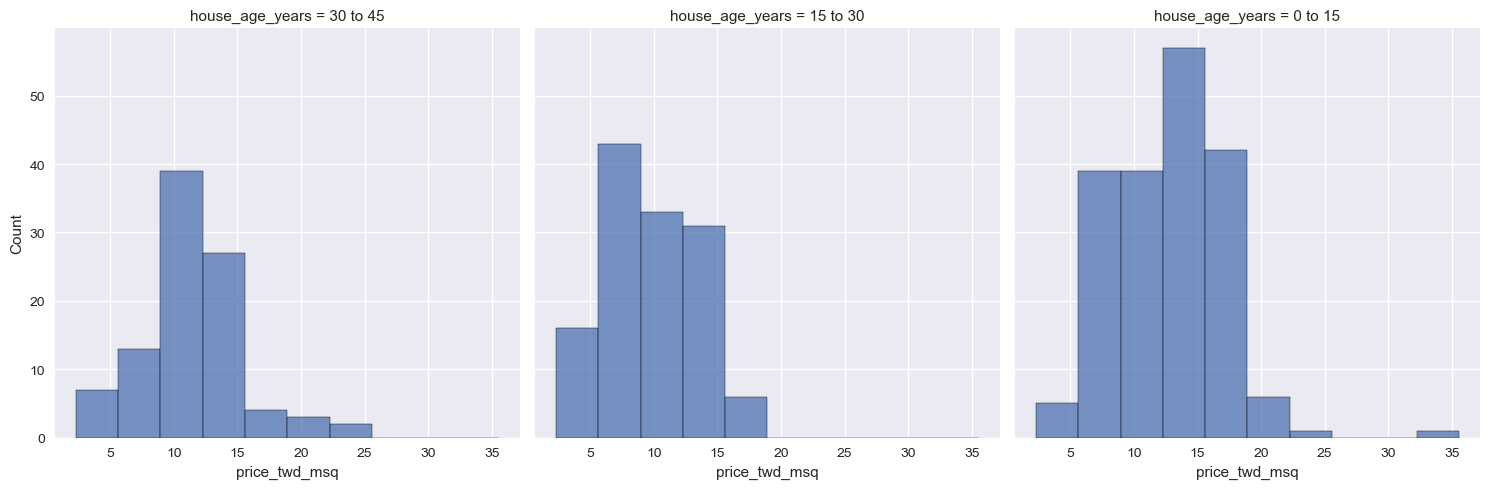

In [7]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         bins=10,
         col='house_age_years')

# Show the plot
plt.show()

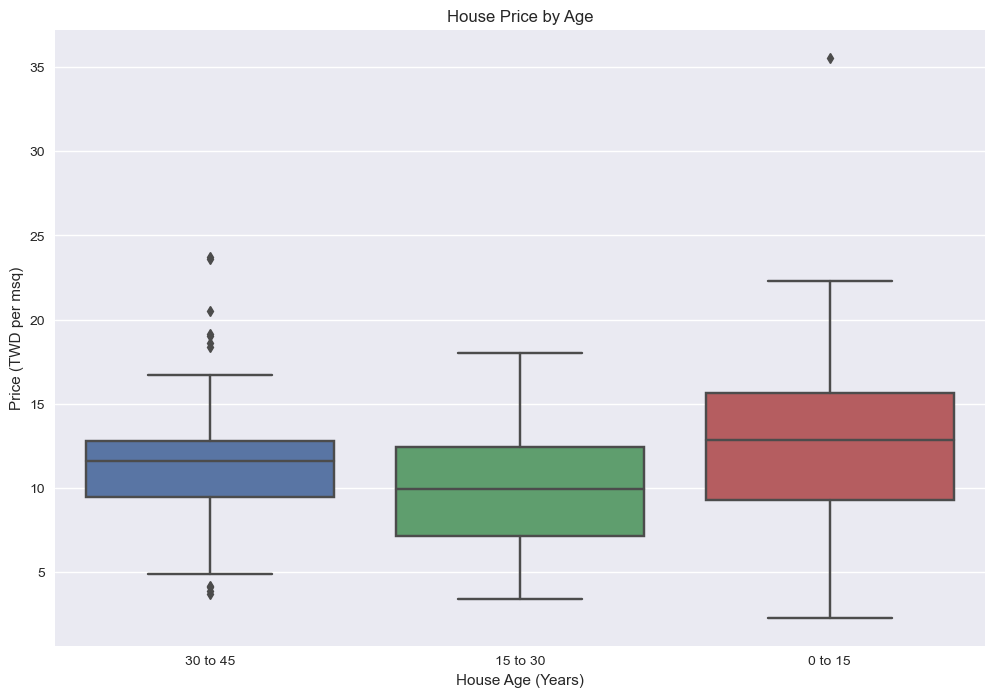

In [8]:
# Similar we can visualize this data with a boxplot
fig = plt.figure(figsize=(12, 8))
sns.boxplot(data=taiwan_real_estate, x='house_age_years',y='price_twd_msq')
plt.xlabel('House Age (Years)')
plt.ylabel('Price (TWD per msq)')
plt.title('House Price by Age')
# Show the plot
plt.show()

In [9]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby(['house_age_years'])['price_twd_msq'].mean()
# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


In [10]:
# Create the model object
mdl_price_vs_age = ols("price_twd_msq ~ house_age_years + 0", data=taiwan_real_estate)
# Fit the model
mdl_price_vs_age = mdl_price_vs_age.fit()
# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


In [11]:
# Create the explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0,11)})
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)
# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv.predict(explanatory_data))
# Print it
print(prediction_data)

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


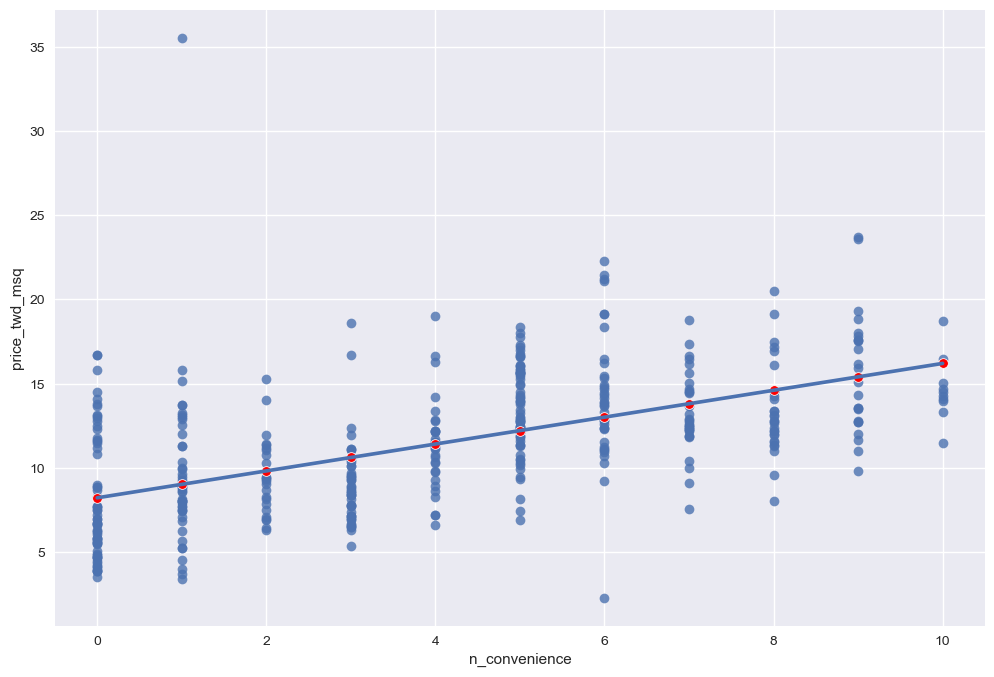

In [12]:
# Create a new figure, fig
fig = plt.figure()
sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
            y="price_twd_msq",
            data=prediction_data,
            color='red')

# Show the layered plot
plt.show()

If we used impossible points in a linear regression model we still get results but they are not very useful. We can see this by using the following code:

In [13]:
impossible = pd.DataFrame({'n_convenience':[-1,2.5]})
print(impossible)
mdl_price_vs_conv.predict(impossible)

   n_convenience
0           -1.0
1            2.5


0     7.426158
1    10.219437
dtype: float64

In [14]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [15]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           3.41e-37
Time:                        15:50:53   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [16]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

intercept = coeffs[0]
slope = coeffs[1]

price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq,'\n')

print(price_twd_msq.assign(prediction_auto=mdl_price_vs_conv.predict(explanatory_data)))

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035 

    n_convenience  prediction_auto
0        8.224237         8.224237
1        9.022317         9.022317
2        9.820397         9.820397
3       10.618477        10.618477
4       11.416556        11.416556
5       12.214636        12.214636
6       13.012716        13.012716
7       13.810795        13.810795
8       14.608875        14.608875
9       15.406955        15.406955
10      16.205035        16.205035


**Regression to the Mean**

This concept states that the linear regression equation is:

$$y = \beta_0 + \beta_1 x + \epsilon$$

where $\epsilon$ is the error term. The error term is the difference between the actual value of $y$ and the predicted value of $y$. The regression to the mean states that the error term is the difference between the actual value of $y$ and the mean of $y$. This means that the error term is the difference between the actual value of $y$ and the predicted value of $y$.

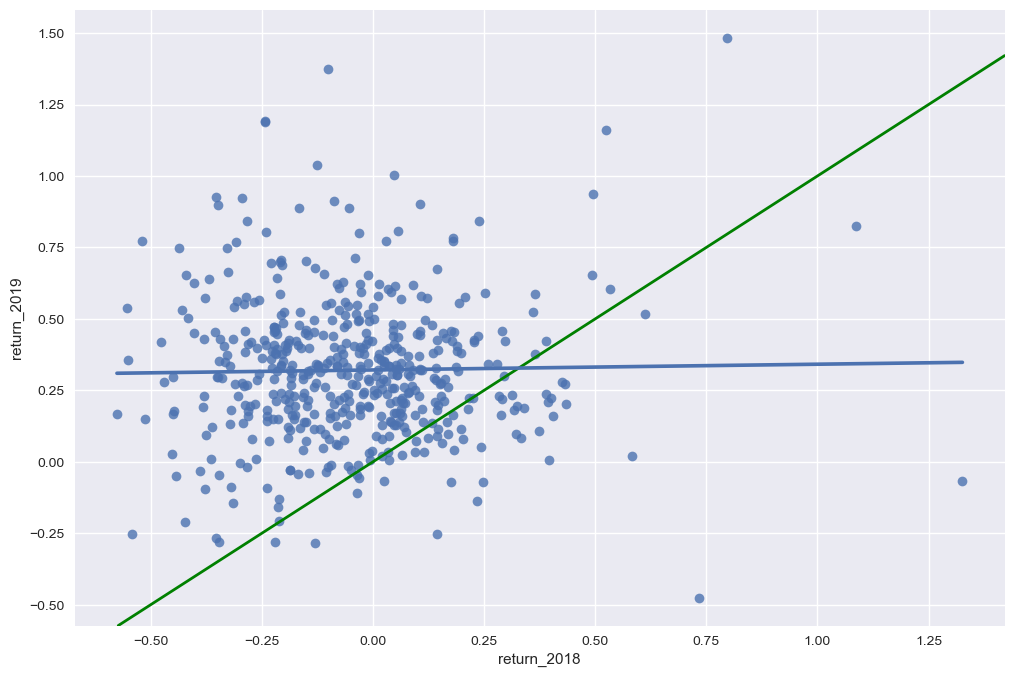

In [17]:
# Create a new figure, fig
fig = plt.figure()
# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")
# Add scatter plot with linear regression trend line
sns.regplot(data=sp500, x='return_2018', y='return_2019',ci=None)
# Show the plot
plt.show()

In [18]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols("return_2019 ~ return_2018", data=sp500).fit()
# Print the parameters
print(mdl_returns.params)

Intercept      0.321321
return_2018    0.020069
dtype: float64


In [19]:
# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({'return_2018': [-1,0,1]})
# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

0    0.301251
1    0.321321
2    0.341390
dtype: float64


#### Transforming the Data

The data can need to transformed sometimes to achieve better results such as using a cube root or a log transformation.

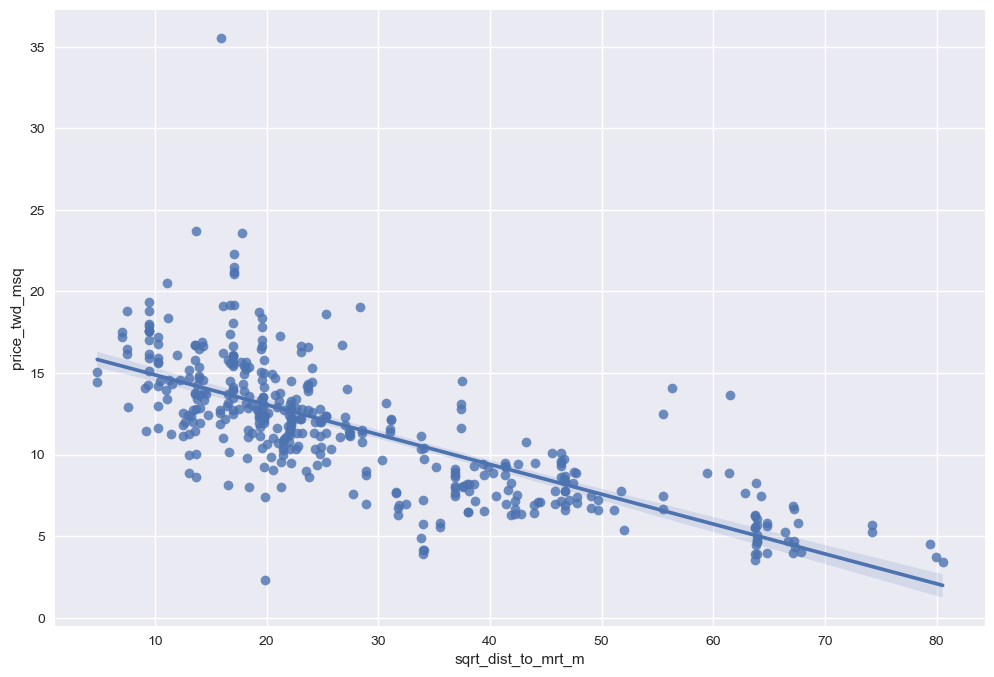

In [20]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
# Plot using the transformed variable
sns.regplot(data=taiwan_real_estate,y='price_twd_msq',x='sqrt_dist_to_mrt_m')
plt.show()

In [21]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m",data=taiwan_real_estate).fit()
# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [22]:
explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})
# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_dist.predict(explanatory_data)
)
# Print the result
print(prediction_data)

   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq
0                 0.0              0      16.709799
1                10.0            100      14.881370
2                20.0            400      13.052942
3                30.0            900      11.224513
4                40.0           1600       9.396085
5                50.0           2500       7.567656
6                60.0           3600       5.739227
7                70.0           4900       3.910799
8                80.0           6400       2.082370


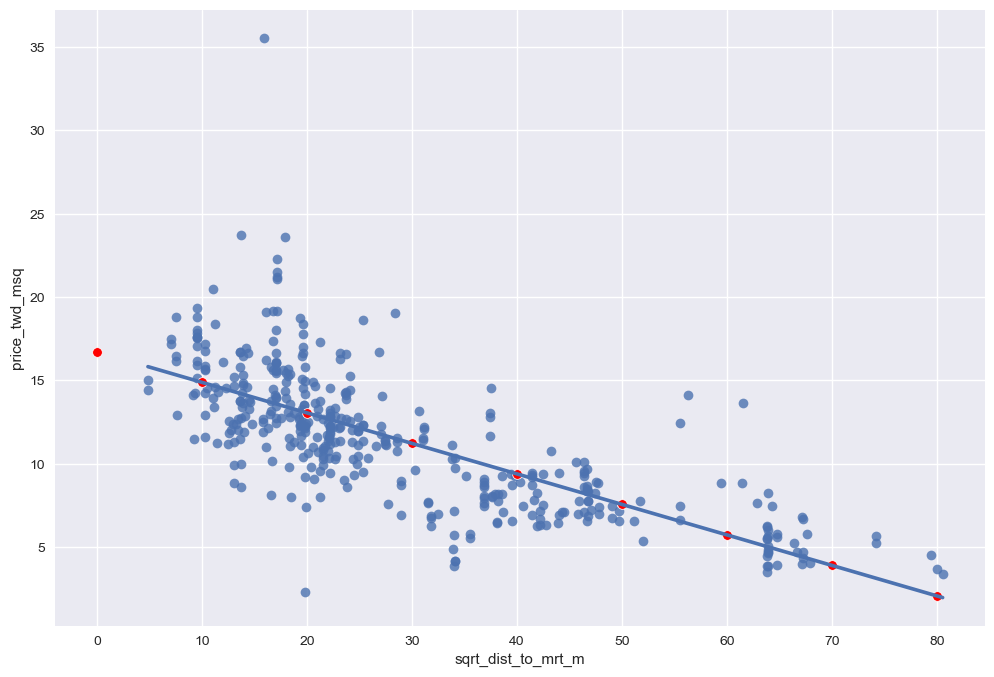

In [23]:
fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="sqrt_dist_to_mrt_m", y='price_twd_msq', color='red')
plt.show()

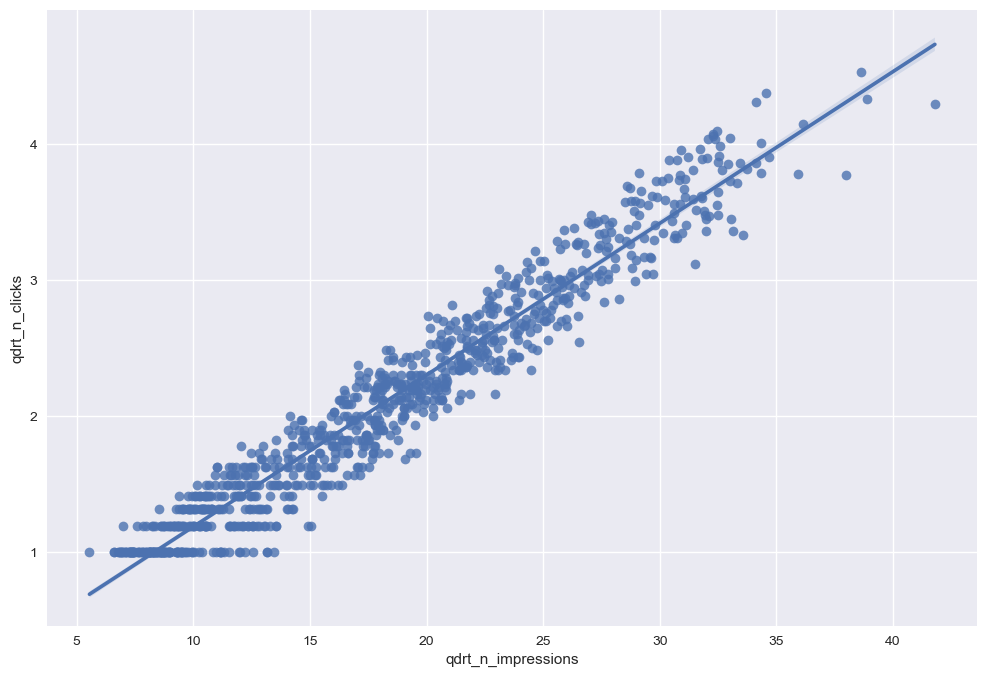

In [24]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = (ad_conversion['n_impressions']) ** 0.25
ad_conversion["qdrt_n_clicks"] = (ad_conversion['n_clicks']) ** 0.25
plt.figure()
# Plot using the transformed variables
sns.regplot(data=ad_conversion, x='qdrt_n_impressions', y='qdrt_n_clicks')
plt.show()

# Run a linear regression of your transformed variables
mdl_click_vs_impression_trans = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion).fit()

In [25]:
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})
# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression_trans.predict(explanatory_data)
)
# Print the result
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


In [26]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data['qdrt_n_clicks'] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


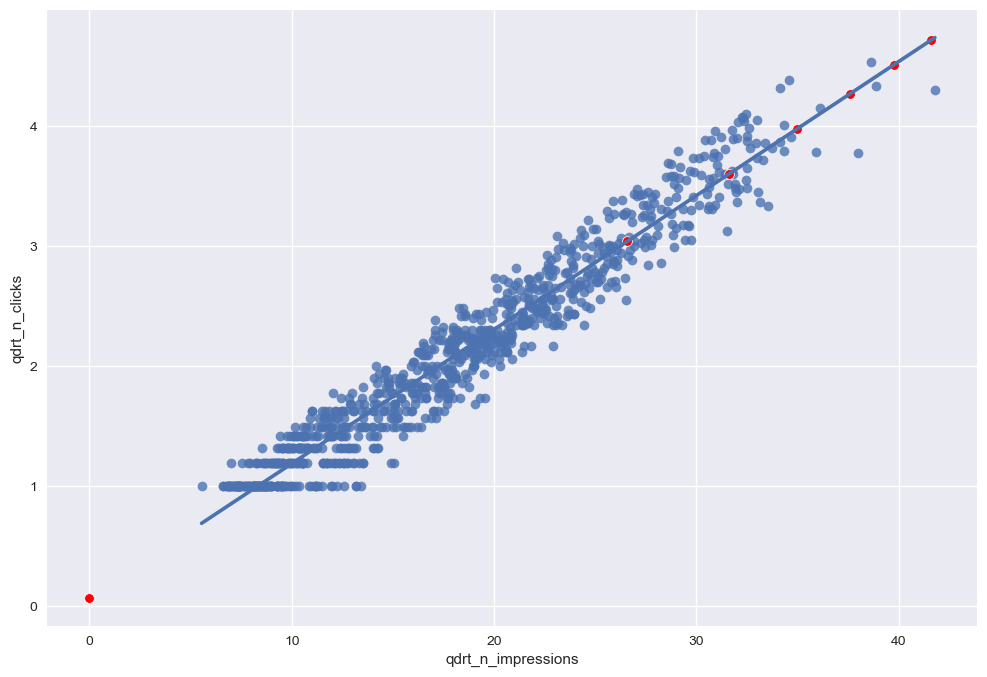

In [27]:
# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x='qdrt_n_impressions', y='qdrt_n_clicks', color='red')
plt.show()

#### Quantifying Model Fit

Often by observing the graph of the model we can tell what kind of relationship exists between the variables. However, we can also quantify the model fit using the following metrics:

* Mean Squared Error (MSE)
* Root Squared Error (RSE)
* Root Mean Squared Error (RMSE)
* Mean Absolute Error (MAE)
* R-Squared
* Adjusted R-Squared

**Mean Squared Error (MSE)**

The MSE is the average of the squared differences between the predicted values and the actual values. The MSE is calculated as:

$$MSE = \frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2$$

where $n$ is the number of observations, $y_i$ is the actual value of $y$ for observation $i$, and $\hat{y}_i$ is the predicted value of $y$ for observation $i$.

**Root Mean Squared Error (RMSE)**

The RMSE is the square root of the MSE. The RMSE is calculated as:

$$RMSE = \sqrt{\frac{1}{n}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$$

**Mean Absolute Error (MAE)**

The MAE is the average of the absolute differences between the predicted values and the actual values. The MAE is calculated as:

$$MAE = \frac{1}{n}\sum_{i=1}^n|y_i - \hat{y}_i|$$

**Root Squared Error (RSE)**

The RSE is the square root of the sum of the squared residuals. The RSE is calculated as:

$$RSE = \sqrt{\frac{1}{(n-k)}\sum_{i=1}^n(y_i - \hat{y}_i)^2}$$

where $n$ is the number of observations, $k$ is the number of predictors, $y_i$ is the actual value of $y$ for observation $i$, and $\hat{y}_i$ is the predicted value of $y$ for observation $i$.

**R-Squared**

The R-Squared is a measure of how well the model fits the data. The R-Squared is calculated as:

$$R^2 = 1 - \frac{SS_{res}}{SS_{tot}}$$

where $SS_{res}$ is the sum of the squared residuals and $SS_{tot}$ is the total sum of squares. The R-Squared is a value between 0 and 1. The closer the R-Squared is to 1, the better the model fits the data.

$SS_{res}$ is calculated as:

$$SS_{res} = \sum_{i=1}^n(y_i - \hat{y}_i)^2$$

$SS_{tot}$ is calculated as:

$$SS_{tot} = \sum_{i=1}^n(y_i - \bar{y})^2$$

where $\bar{y}$ is the mean of $y$. The R-Squared is also equal to the square of the correlation coefficient between $y$ and $\hat{y}$.

**Adjusted R-Squared**

The Adjusted R-Squared is a measure of how well the model fits the data. The Adjusted R-Squared is calculated as:

$$R^2_{adj} = 1 - \frac{(1 - R^2)(n - 1)}{n - p - 1}$$

where $n$ is the number of observations and $p$ is the number of predictors. The Adjusted R-Squared is a value between 0 and 1. The closer the Adjusted R-Squared is to 1, the better the model fits the data.

1. ***We use the Adjusted R-Squared instead of the R-Squared when we are comparing models with different numbers of predictors. The Adjusted R-Squared penalizes the R-Squared for the number of predictors in the model.***

2. ***It is preferable to use RSE instead of RMSE when comparing models with different numbers of observations.***

In [28]:
mdl_click_vs_impression_orig = ols("n_clicks ~ n_impressions", data=ad_conversion).fit()

#Print summary of the original model
print(mdl_click_vs_impression_orig.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:50:58   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [29]:
# Print summary of the transformed model
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:          qdrt_n_clicks   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                 1.590e+04
Date:                Sat, 18 Mar 2023   Prob (F-statistic):               0.00
Time:                        15:50:58   Log-Likelihood:                 193.90
No. Observations:                 936   AIC:                            -383.8
Df Residuals:                     934   BIC:                            -374.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.0717      0

In [30]:
#Print residual standard error of the original model
print(mdl_click_vs_impression_orig.rsquared,'\n')

# Print residual standard error of the transformed model
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041 

0.9445272817143905


In [31]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid
# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)
# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid
# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875727


In [100]:
# Creating a function to calculate sum of squared errors

x_actual = taiwan_real_estate['n_convenience']
y_actual = taiwan_real_estate['price_twd_msq']

# Define calc_sum_of_squares()
def calc_sum_of_squares(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs
    # Calculate predicted y-values
    y_pred = intercept + slope * x_actual
    # Calculate differences between y_pred and y_actual
    y_diff = y_pred - y_actual
    # Calculate sum of squares
    sum_sq = np.sum(y_diff ** 2)
    # Return sum of squares
    return sum_sq

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_sum_of_squares,
               x0=[0,0]))

# Compare the output with the ols() call.
print(ols("price_twd_msq ~ n_convenience", data=taiwan_real_estate).fit().params)

      fun: 4717.68623992569
 hess_inv: array([[ 0.00354669, -0.00057129],
       [-0.00057129,  0.00013954]])
      jac: array([0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([8.22423743, 0.79807971])
Intercept        8.224237
n_convenience    0.798080
dtype: float64


#### Quantifying Model Fit with Plotting

**Residual Plots**

The residual plot is a plot of the residuals versus the predicted values. The residuals are the difference between the actual values and the predicted values. The residual plot is a good way to check for non-linearity, outliers, and high leverage points.

**Scale-Location Plots**

The scale-location plot is a plot of the absolute value of the residuals versus the predicted values. The scale-location plot is a good way to check for non-constant variance.

**Normal Q-Q Plots**

The normal Q-Q plot is a plot of the quantiles of the residuals versus the quantiles of the normal distribution. The normal Q-Q plot is a good way to check for normality.

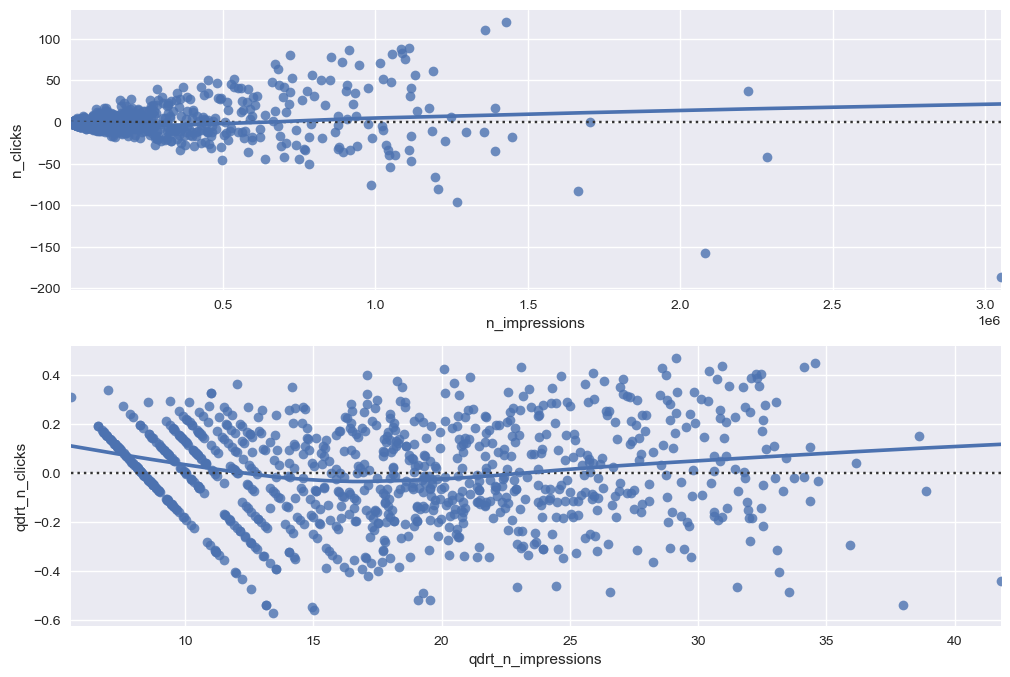

In [32]:
#Plot the residuals of the original model above the transformed model
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
sns.residplot(data=ad_conversion, x='n_impressions', y='n_clicks', ax=ax1, lowess=True)
sns.residplot(data=ad_conversion, x='qdrt_n_impressions', y='qdrt_n_clicks', ax=ax2, lowess=True)
plt.show()

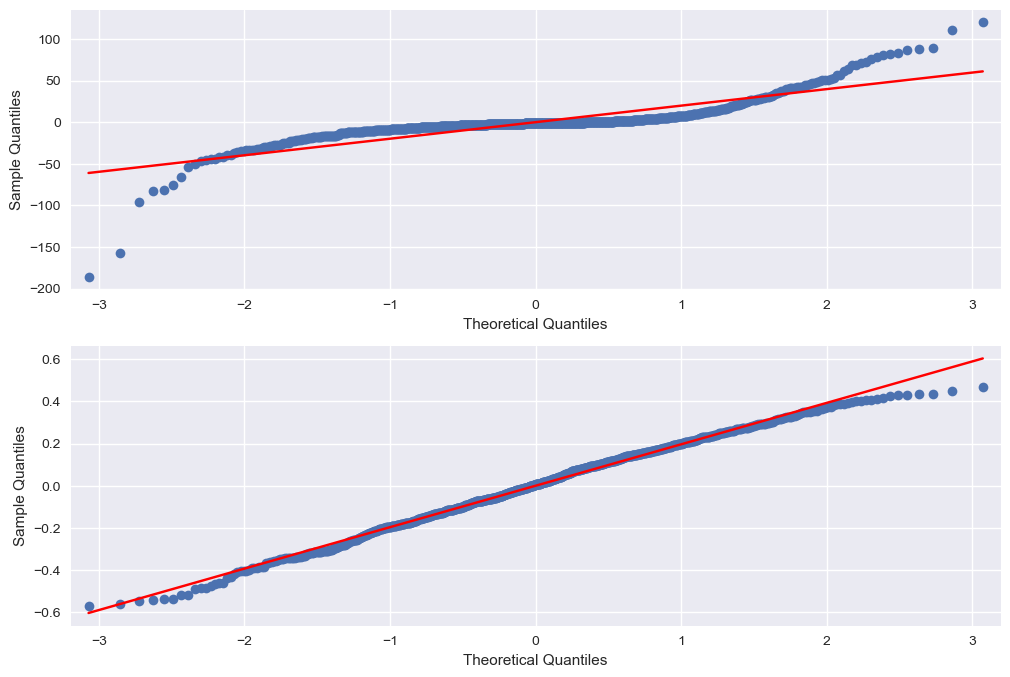

In [33]:
# Create qqplot of the residuals of the original model and transformed model
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
qqplot(mdl_click_vs_impression_orig.resid, line='s', ax=ax1)
qqplot(mdl_click_vs_impression_trans.resid, line='s', ax=ax2)
plt.show()

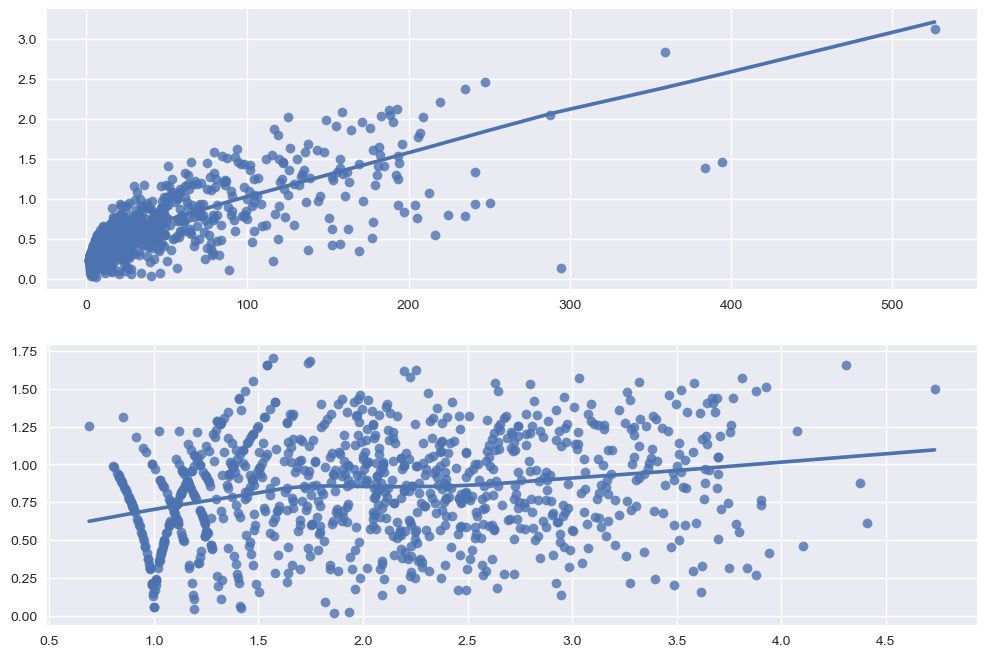

In [34]:
# Create Scale Location plot of the residuals of the original model and transformed model
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=False)
# Preprocessing steps
model_norm_residuals_1 = mdl_click_vs_impression_orig.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_1 = np.sqrt(np.abs(model_norm_residuals_1))
sns.regplot(x=mdl_click_vs_impression_orig.fittedvalues, y=model_norm_residuals_abs_sqrt_1, lowess=True, ax=ax1)
# Preprocessing steps
model_norm_residuals_2 = mdl_click_vs_impression_trans.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt_2 = np.sqrt(np.abs(model_norm_residuals_2))
sns.regplot(x=mdl_click_vs_impression_trans.fittedvalues, y=model_norm_residuals_abs_sqrt_2, lowess=True, ax=ax2)
plt.show()

All three plots show that the transformed data is a better fit for the model.

#### Outliers, Leverage and Influential Points

Outliers, leverage and influential points are points that have a disproportionate effect on the model. Outliers are points that have a large residual. Leverage points are points that have a large influence on the fitted regression line. Influential points are points that have a large influence on the fitted regression line and have a large residual.

**Outliers**

Outliers are points that have a large residual. We can identify outliers by looking at the residual plot. We can also identify outliers by looking at the Cook's Distance. The Cook's Distance is calculated as:

$$D_i = \frac{r_i^2}{p(n - p - 1)}$$

where $r_i$ is the residual for observation $i$, $p$ is the number of predictors, and $n$ is the number of observations. The Cook's Distance is a value between 0 and 1. The larger the Cook's Distance, the more influential the point is.

**Leverage Points**

Leverage points are points that have a large influence on the fitted regression line. We can identify leverage points by looking at the leverage plot. We can also identify leverage points by looking at the DFFITS statistic. The DFFITS statistic is calculated as:

$$DFFITS_i = \frac{\hat{y}_i - \hat{y}_{i0}}{s\sqrt{h_i(1 - h_i)}}$$

where $\hat{y}_i$ is the predicted value of $y$ for observation $i$, $\hat{y}_{i0}$ is the predicted value of $y$ for observation $i$ when the predictor is removed, $s$ is the standard deviation of the residuals, $h_i$ is the leverage for observation $i$, and $n$ is the number of observations. The DFFITS statistic is a value between -1 and 1. The larger the DFFITS statistic, the more influential the point is.

**Influential Points**

Influential points are points that have a large influence on the fitted regression line and have a large residual. We can identify influential points by looking at the influence plot. We can also identify influential points by looking at the DFBETAS statistic. The DFBETAS statistic is calculated as:

$$DFBETAS_i = \frac{\hat{\beta}_j - \hat{\beta}_{j0}}{s\sqrt{h_i(1 - h_i)}}$$

where $\hat{\beta}_j$ is the predicted value of $\beta_j$ for observation $i$, $\hat{\beta}_{j0}$ is the predicted value of $\beta_j$ for observation $i$ when the predictor is removed, $s$ is the standard deviation of the residuals, $h_i$ is the leverage for observation $i$, and $n$ is the number of observations. The DFBETAS statistic is a value between -1 and 1. The larger the DFBETAS statistic, the more influential the point is.


In [35]:
summary_info = mdl_click_vs_impression_trans.get_influence().summary_frame()
summary_info

,dfb_Intercept,dfb_qdrt_n_impressions,cooks_d,standard_resid,hat_diag,dffits_internal,student_resid,dffits
0,-0.025941,0.020961,3.709625e-04,-0.531155,0.002623,-0.027238,-0.530951,-0.027228
1,-0.034293,0.025444,7.325553e-04,-0.873931,0.001915,-0.038277,-0.873821,-0.038272
2,0.007449,-0.006204,2.955100e-05,0.138555,0.003069,0.007688,0.138482,0.007684
3,0.009336,-0.007786,4.634846e-05,0.172835,0.003094,0.009628,0.172745,0.009623
4,-0.000509,0.000384,1.569864e-07,-0.012463,0.002017,-0.000560,-0.012456,-0.000560
...,...,...,...,...,...,...,...,...
931,-0.068374,0.092343,5.322341e-03,1.406998,0.005348,0.103173,1.407737,0.103227
932,-0.013349,0.020197,3.076374e-04,0.439471,0.003176,0.024805,0.439281,0.024794
933,0.000738,0.001083,1.144507e-05,0.142486,0.001126,0.004784,0.142412,0.004782
934,-0.002159,0.003100,6.648284e-06,0.058523,0.003867,0.003646,0.058492,0.003645


In [36]:
# We are interested in the Cook's distance, leverage, and residuals. We will add this to our dataframe
ad_conversion = ad_conversion.assign(
    cooks_d = summary_info['cooks_d'],
    leverage = summary_info['hat_diag'],
    resid = summary_info['standard_resid']
)
# Print the first 5 rows of ad_conversion
ad_conversion.sort_values(by='cooks_d', ascending=False).head()


,spent_usd,n_impressions,n_clicks,qdrt_n_impressions,qdrt_n_clicks,cooks_d,leverage,resid
332,360.150001,2080666,202,37.979618,3.769970,0.034532,0.009092,-2.743546
329,639.949998,3052003,340,41.797109,4.294076,0.031810,0.012458,-2.245702
328,236.769999,1267550,123,33.553766,3.330246,0.018105,0.005926,-2.464600
819,541.700002,1428421,367,34.571168,4.376899,0.017369,0.006584,2.289464
788,465.079998,1358324,346,34.139004,4.312896,0.015461,0.006299,2.208632


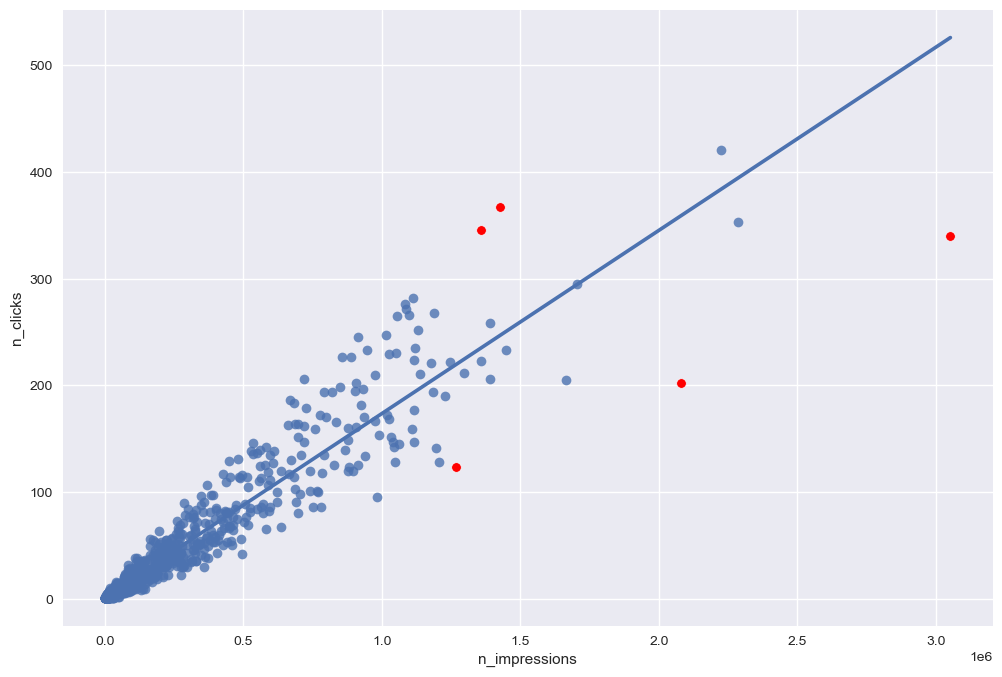

In [37]:
# Lets plot the 5 highest Cook's distance points
fig = plt.figure()
sns.regplot(x="n_impressions", y="n_clicks", data=ad_conversion, ci=None)
sns.scatterplot(data=ad_conversion.sort_values(by='cooks_d', ascending=False).head(), x='n_impressions', y='n_clicks', color='red')
plt.show()

#### Simple Logit Regression

While linear regression is used to predict quantitative responses, logistic regression is used to predict qualitative responses. Logistic regression is used to predict a binary response. The response is coded as 0 or 1. The logistic regression model is:

$$\log\left(\frac{p}{1 - p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$$

where $p$ is the probability of the response being 1, $x_1, x_2, ..., x_p$ are the predictors, and $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the regression coefficients.

Odds are the ratio of the probability of an event occurring to the probability of the event not occurring. The odds are calculated as:

$$odds = \frac{p}{1 - p}$$ 

which is what is on the left side of the equation above.

Cases where we are more likely to use logistic regression include:

1. Predicting whether a customer will default on a loan
2. Predicting whether a customer will buy a product
3. Predicting whether a customer will churn
4. Predicting whether a customer will respond to a marketing campaign

Well you get the idea.

<Figure size 1200x800 with 0 Axes>

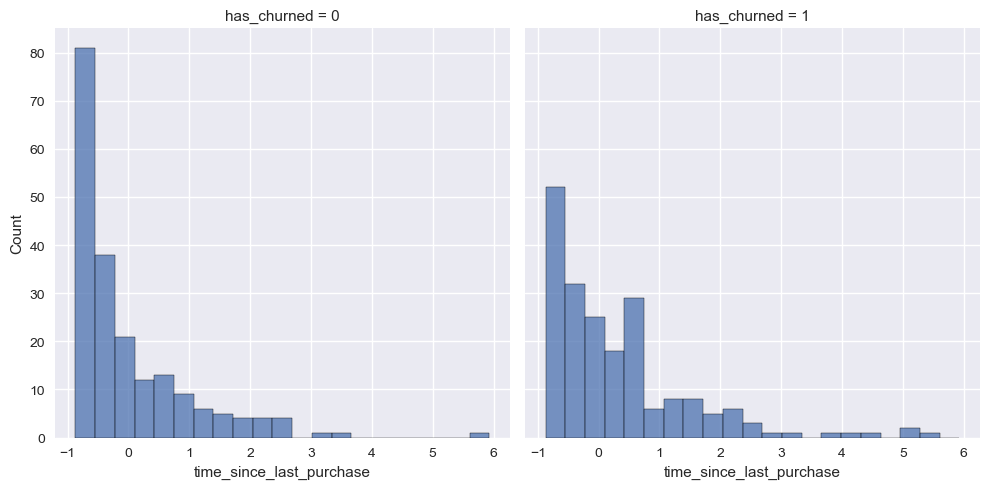

In [38]:
# Plot churn data 
fig = plt.figure()
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data=churn, col='has_churned', x='time_since_last_purchase')
plt.show()

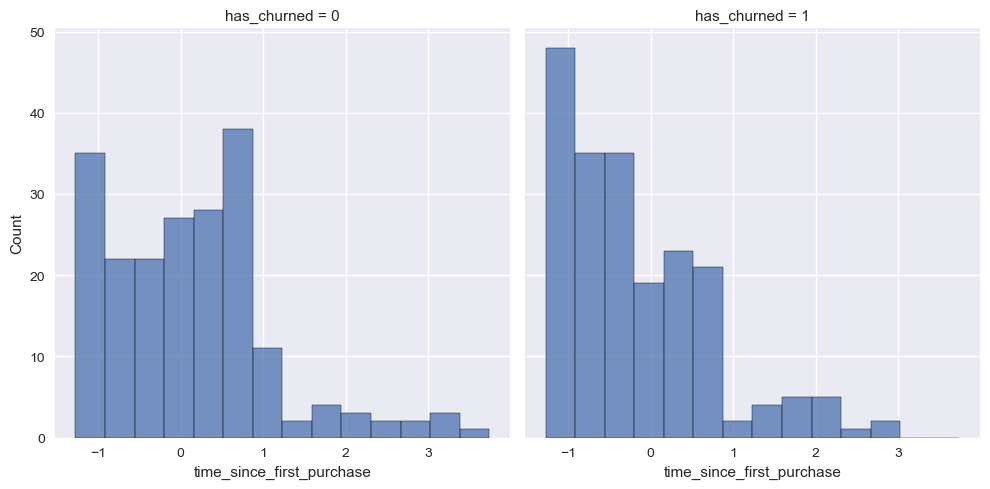

In [39]:
# Redraw the plot with time_since_first_purchase
sns.displot(data=churn, col='has_churned', x='time_since_first_purchase')
plt.show()

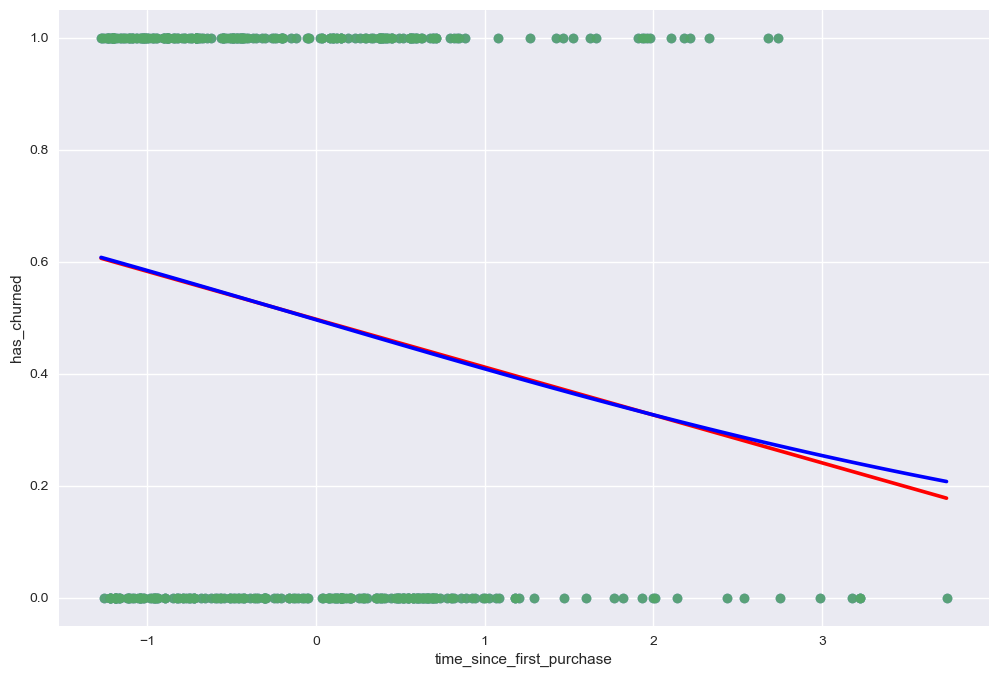

In [40]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})
# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "blue"},logistic=True)

plt.show()

Predicting churn is a good example of when we would use logistic regression. Churn is when a customer stops doing business with a company. Churn is a binary response. The response is coded as 0 or 1. The response is 1 if the customer churns and 0 if the customer does not churn. The predictors are the customer's time since first purchase. 

In [41]:
# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()
# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


In [42]:
#Create explanatory_data
explanatory_data = pd.DataFrame({
    'time_since_first_purchase': np.arange(-4, 4, 0.5)
})
# Create prediction_data
prediction_data = explanatory_data.assign(
  has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)
# Print the head
print(prediction_data)

    time_since_first_purchase  has_churned
0                        -4.0     0.802817
1                        -3.5     0.773223
2                        -3.0     0.740621
3                        -2.5     0.705121
4                        -2.0     0.666946
5                        -1.5     0.626448
6                        -1.0     0.584096
7                        -0.5     0.540465
8                         0.0     0.496204
9                         0.5     0.452003
10                        1.0     0.408546
11                        1.5     0.366473
12                        2.0     0.326342
13                        2.5     0.288604
14                        3.0     0.253587
15                        3.5     0.221496


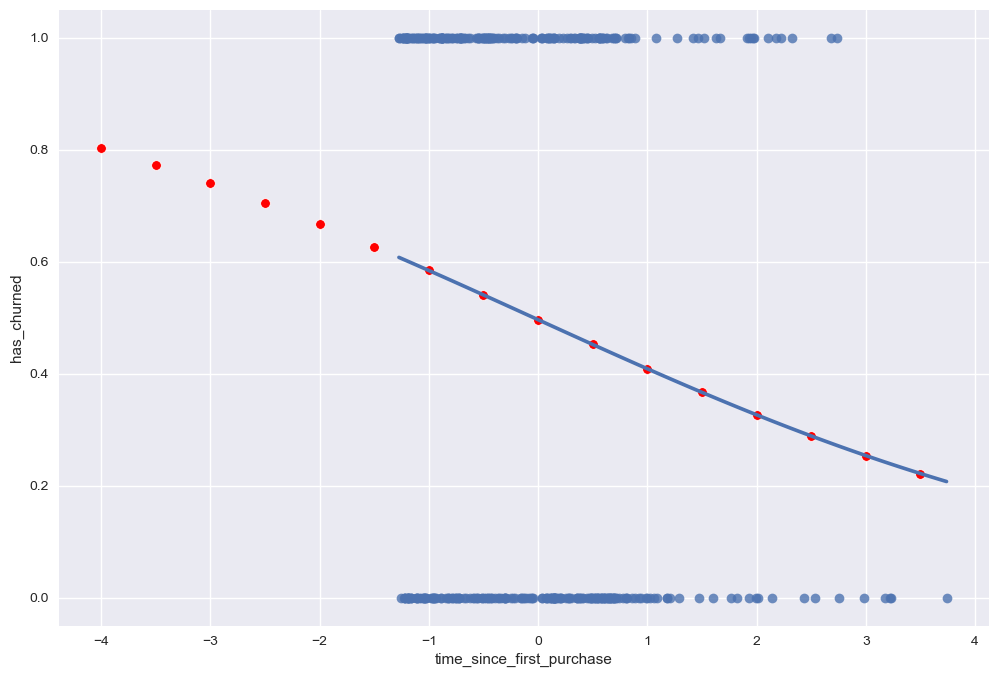

In [43]:
#Plot the logistic regression and prediction data
fig = plt.figure()
sns.regplot(x='time_since_first_purchase',y='has_churned',data=churn,ci=False,logistic=True)
sns.scatterplot(data=prediction_data, x='time_since_first_purchase', y='has_churned', color='red')
plt.show()

In [44]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])
# Print the head
prediction_data.head(5)

,time_since_first_purchase,has_churned,most_likely_outcome
0,-4.0,0.802817,1.0
1,-3.5,0.773223,1.0
2,-3.0,0.740621,1.0
3,-2.5,0.705121,1.0
4,-2.0,0.666946,1.0


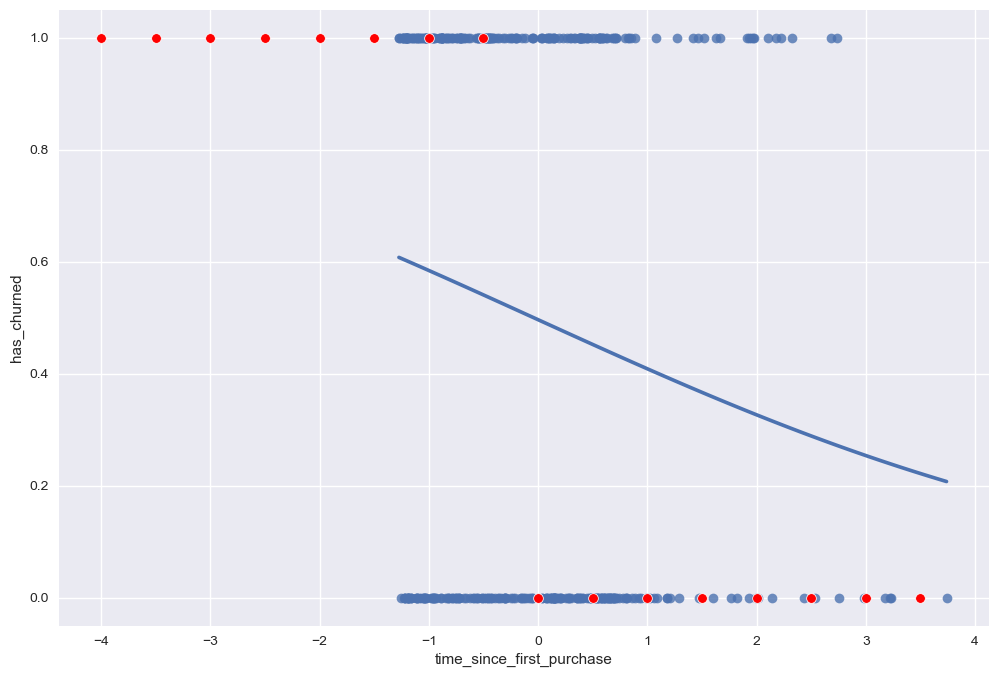

In [45]:
#Plot the logistic regression and prediction data
fig = plt.figure()
sns.regplot(x='time_since_first_purchase',y='has_churned',data=churn,ci=False,logistic=True)
sns.scatterplot(data=prediction_data, x='time_since_first_purchase', y='most_likely_outcome', color='red')
plt.show()

In [46]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data['has_churned'] / (1 - prediction_data['has_churned'])
# Print the head
prediction_data.head(5)

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio
0,-4.0,0.802817,1.0,4.071435
1,-3.5,0.773223,1.0,3.409610
2,-3.0,0.740621,1.0,2.855367
3,-2.5,0.705121,1.0,2.391218
4,-2.0,0.666946,1.0,2.002518


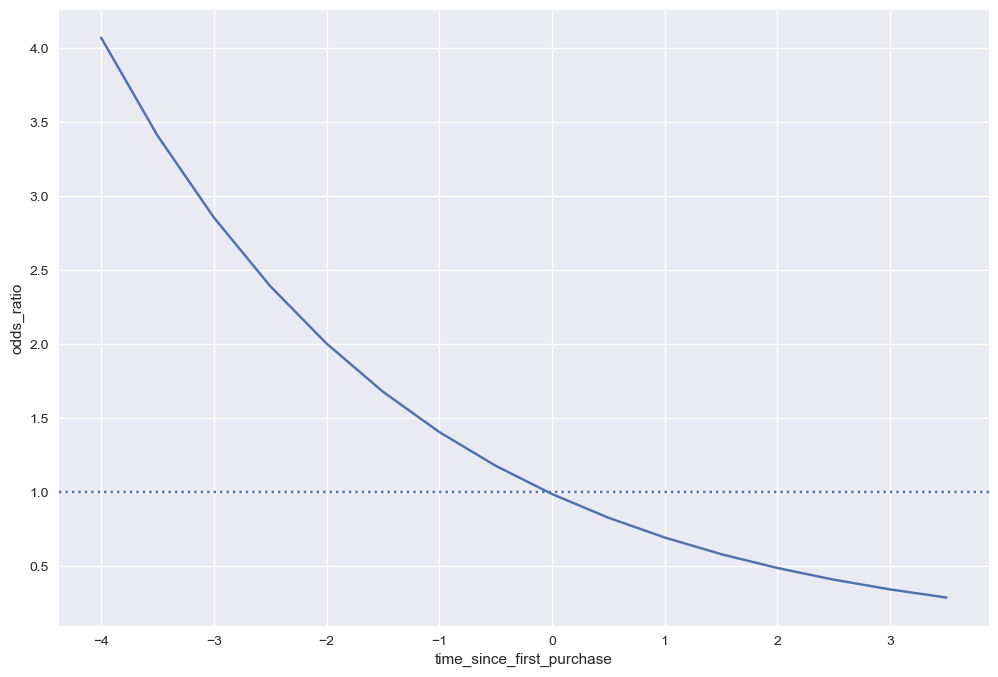

In [47]:
fig = plt.figure()
# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x='time_since_first_purchase', y='odds_ratio', data=prediction_data)
# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")
plt.show()

In [48]:
# Update prediction data with log_odds_ratio
prediction_data['log_odds_ratio'] = np.log(prediction_data['odds_ratio'])
# Print the head
prediction_data.head(5)

,time_since_first_purchase,has_churned,most_likely_outcome,odds_ratio,log_odds_ratio
0,-4.0,0.802817,1.0,4.071435,1.403995
1,-3.5,0.773223,1.0,3.409610,1.226598
2,-3.0,0.740621,1.0,2.855367,1.049200
3,-2.5,0.705121,1.0,2.391218,0.871803
4,-2.0,0.666946,1.0,2.002518,0.694405


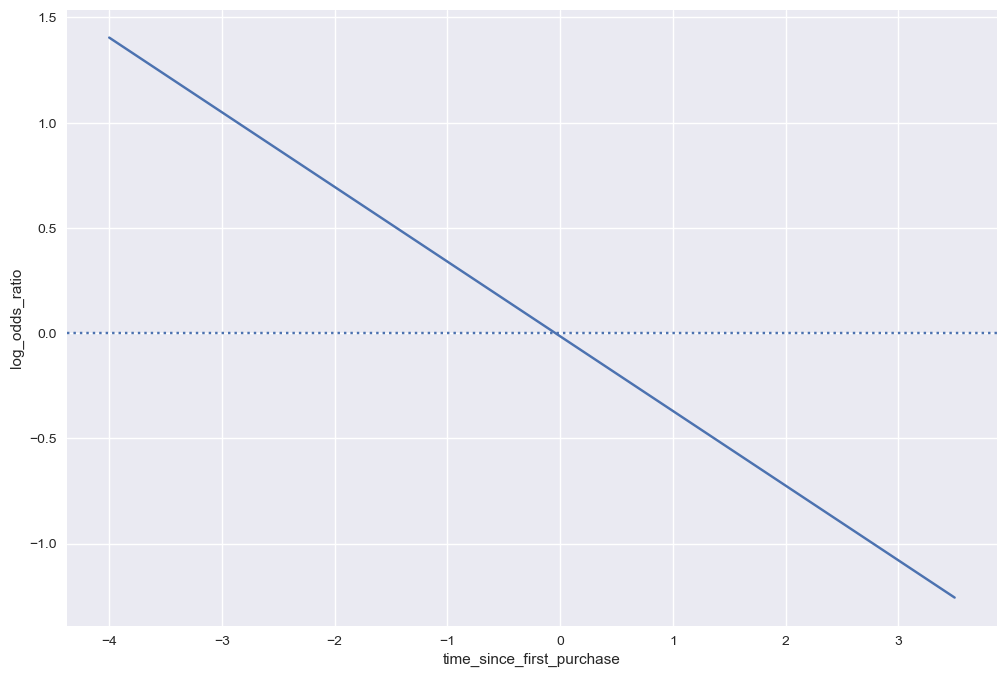

In [49]:
fig = plt.figure()
# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)
# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")
plt.show()

**Quantifying Logistic Regression Model Fit**

We can use a confusion matrix to quantify the fit of a logistic regression model. The confusion matrix is a table that shows the number of true positives, false positives, true negatives, and false negatives. The confusion matrix is shown below:

| | Predicted 0 | Predicted 1 |
|:---:|:---:|:---:|
| Actual 0 | True Negative | False Positive |
| Actual 1 | False Negative | True Positive |

The true positive rate is the proportion of actual positives that are correctly identified as positive. The true positive rate is calculated as:

$$TPR = \frac{TP}{TP + FN}$$

The true negative rate is the proportion of actual negatives that are correctly identified as negative. The true negative rate is calculated as:

$$TNR = \frac{TN}{TN + FP}$$

The false positive rate is the proportion of actual negatives that are incorrectly identified as positive. The false positive rate is calculated as:

$$FPR = \frac{FP}{FP + TN}$$

The false negative rate is the proportion of actual positives that are incorrectly identified as negative. The false negative rate is calculated as:

$$FNR = \frac{FN}{FN + TP}$$

The accuracy is the proportion of actual responses that are correctly identified. The accuracy is calculated as:

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

The precision is the proportion of predicted positives that are actually positive. The precision is calculated as:

$$Precision = \frac{TP}{TP + FP}$$

The recall is the proportion of actual positives that are correctly identified as positive. The recall is calculated as:

$$Recall = \frac{TP}{TP + FN}$$


The specificity is the proportion of actual negatives that are correctly identified as negative. The specificity is calculated as:

$$Specificity = \frac{TN}{TN + FP}$$

The F1 score is the harmonic mean of the precision and recall. The F1 score is calculated as:

$$F1 = \frac{2TP}{2TP + FP + FN}$$


In [50]:
# Get the actual responses
actual_response = churn['has_churned']
# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict(churn))
# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response':actual_response,
                         'predicted_response':predicted_response})
# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


[[112.  88.]
 [ 76. 124.]]


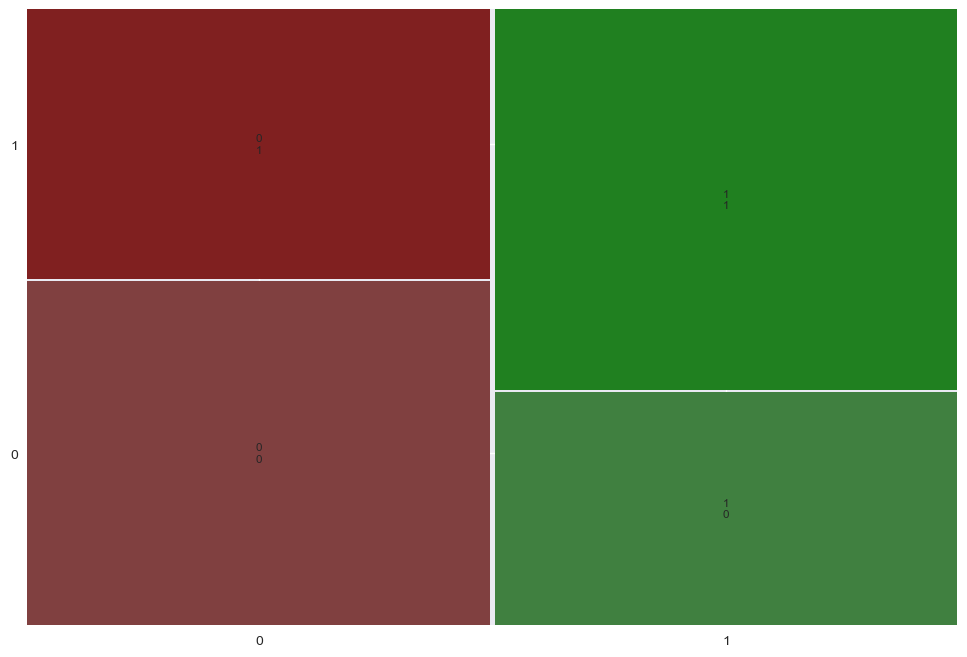

In [51]:
# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()
# Print it
print(conf_matrix)
# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

In [52]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]
# Calculate and print the accuracy
accuracy = (TN + TP) /(TN + TP + FN + FP)
print("accuracy: ", accuracy)
# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)
# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56


### Multiple Linear Regression

#### Multiple Linear Regression

Multiple linear regression is used to predict a quantitative response using multiple predictors. The response is continuous. The predictors are continuous, categorical, or a combination of both. The multiple linear regression model is:

$$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p + \epsilon$$

where $y$ is the response, $x_1, x_2, ..., x_p$ are the predictors, $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the regression coefficients, and $\epsilon$ is the error term.

In [53]:
# Lets see the models from our taiwan house price dataset
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           3.41e-37
Time:                        15:51:31   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

In [54]:
# Similarly, we will revisit the summary for the model of price vs. age
print(mdl_price_vs_age.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.079
Method:                 Least Squares   F-statistic:                     18.80
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.54e-08
Time:                        15:51:32   Log-Likelihood:                -1154.7
No. Observations:                 414   AIC:                             2315.
Df Residuals:                     411   BIC:                             2327.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
house_age_years[0 to 1

In [55]:
# We will now create a model combining the two
mdl_price_vs_both = ols("price_twd_msq ~ n_convenience + house_age_years + 0", data=taiwan_real_estate).fit()
# Print the summary
print(mdl_price_vs_both.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     89.29
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           1.75e-44
Time:                        15:51:32   Log-Likelihood:                -1068.7
No. Observations:                 414   AIC:                             2145.
Df Residuals:                     410   BIC:                             2162.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
house_age_years[0 to 1

We can see that the Rsquared is higher in this case than for both the previous models

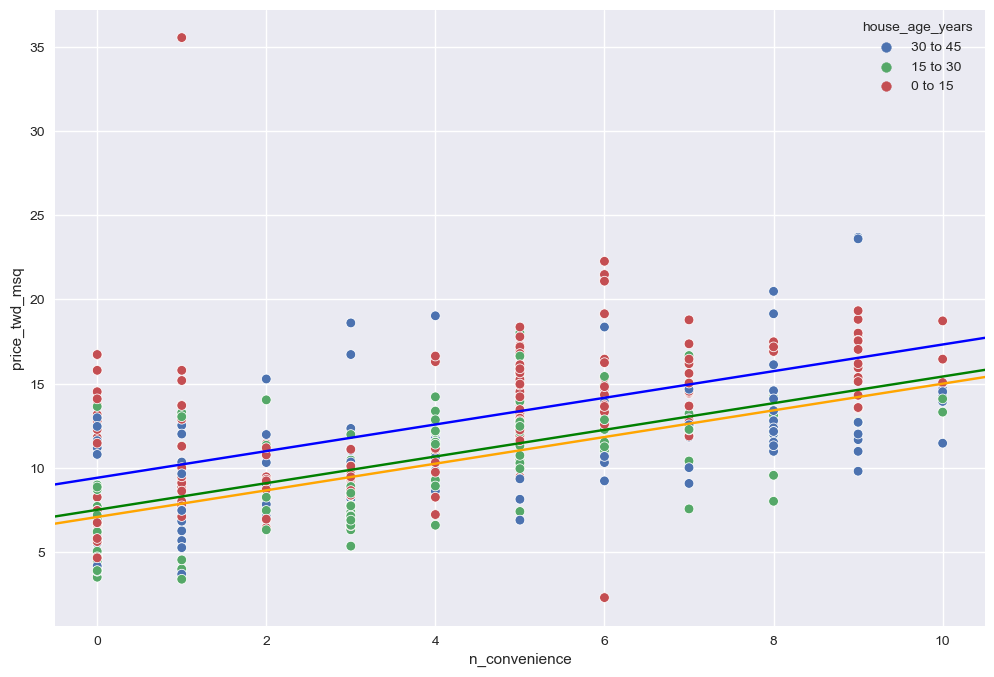

In [56]:
# Lets plot this model
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params
# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

fig = plt.figure()
# Draw a scatter plot of price_twd_msq vs. n_convenience colored by house_age_years
sns.scatterplot(data=taiwan_real_estate, x='n_convenience',y='price_twd_msq',hue='house_age_years')
# Add three parallel lines for each category of house_age_years
# Color the line for ic_0_15 blue
plt.axline(xy1=(0, ic_0_15), slope=slope, color="blue")
# Color the line for ic_15_30 orange
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
# Color the line for ic_30_45 green
plt.axline(xy1=(0, ic_30_45), slope=slope, color="green")
# Show the plot
plt.show()

In [57]:
# Lets make some predictions using the model. Create explanatory_data

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11)
# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()
# Create p as all combinations of values of n_convenience and house_age_years
p = it.product(n_convenience, house_age_years)
# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience', 'house_age_years'])
# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both.predict(explanatory_data))
prediction_data.head()

,n_convenience,house_age_years,price_twd_msq
0,0,30 to 45,7.510958
1,0,15 to 30,7.085169
2,0,0 to 15,9.413325
3,1,30 to 45,8.302415
4,1,15 to 30,7.876627


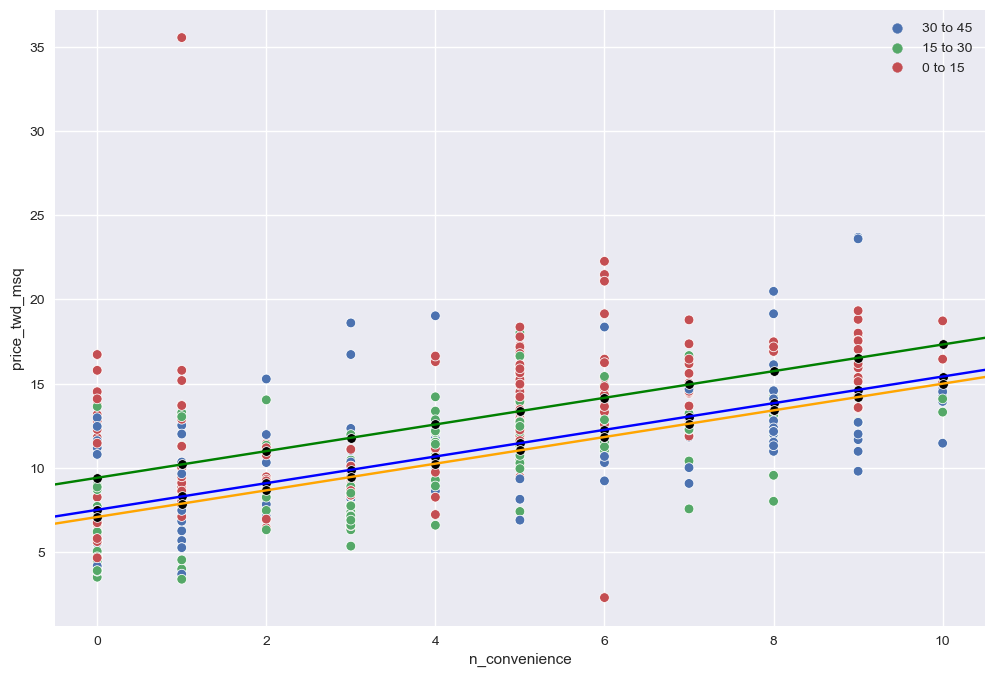

In [58]:
# Extract the model coefficients, coeffs
coeffs = mdl_price_vs_both.params
# Assign each of the coeffs
ic_0_15, ic_15_30, ic_30_45, slope = coeffs

# Create the parallel slopes plot
plt.axline(xy1=(0, ic_0_15), slope=slope, color="green")
plt.axline(xy1=(0, ic_15_30), slope=slope, color="orange")
plt.axline(xy1=(0, ic_30_45), slope=slope, color="blue")
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                hue="house_age_years",
                data=taiwan_real_estate)

# Add the predictions in black
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                color="black",
                data=prediction_data)

plt.show()

In [59]:
# Define conditions
conditions = [
	explanatory_data['house_age_years'] == "0 to 15",
	explanatory_data['house_age_years'] == "15 to 30",
	explanatory_data['house_age_years'] == "30 to 45"]
# Define choices
choices = [ic_0_15, ic_15_30, ic_30_45]
# Create array of intercepts for each house_age_year category
intercept = np.select(conditions, choices)
# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(
			      intercept = intercept,
  			      price_twd_msq = intercept + slope * explanatory_data['n_convenience'])

prediction_data.head()

,n_convenience,house_age_years,intercept,price_twd_msq
0,0,30 to 45,7.510958,7.510958
1,0,15 to 30,7.085169,7.085169
2,0,0 to 15,9.413325,9.413325
3,1,30 to 45,7.510958,8.302415
4,1,15 to 30,7.085169,7.876627


In [60]:
# Evaluate the model
# Print the coeffs of determination for mdl_price_vs_conv
print("rsquared_conv: ", mdl_price_vs_conv.rsquared)
print("rsquared_adj_conv: ", mdl_price_vs_conv.rsquared_adj)
print("rse_conv: ", np.sqrt(mdl_price_vs_conv.mse_resid),'\n')

# Print the coeffs of determination for mdl_price_vs_age
print("rsquared_age: ", mdl_price_vs_age.rsquared)
print("rsquared_adj_age: ", mdl_price_vs_age.rsquared_adj)
print("rse_age: ", np.sqrt(mdl_price_vs_age.mse_resid),'\n')

# Print the coeffs of determination for mdl_price_vs_both
print("rsquared_both: ", mdl_price_vs_both.rsquared)
print("rsquared_adj_both: ", mdl_price_vs_both.rsquared_adj)
print("rse_both: ", np.sqrt(mdl_price_vs_both.mse_resid))

rsquared_conv:  0.32604660851305034
rsquared_adj_conv:  0.32441079931041206
rse_conv:  3.383887521343047 

rsquared_age:  0.08382749316665172
rsquared_adj_age:  0.07936923279276686
rse_age:  3.950183875630859 

rsquared_both:  0.39517387968887374
rsquared_adj_both:  0.3907483227109875
rse_both:  3.213460280552323


As stated before the rsquared or coefficient of determination is better for multiple linear regression than simple linear regression. We can also infer that there is no overfitting in this case as the rsquared is not significantly higher than the adjusted rsquared. Observing the residual sum of squares we can see that the error is lower than in the previous models. This is a good sign as it means that the model is a better fit for the data. 

#### Models with Categorical Variables

We can use categorical variables in our models. We can use dummy variables to represent categorical variables. Dummy variables are binary variables that take the value 0 or 1. We can use dummy variables to represent categorical variables with two levels. We can use dummy variables to represent categorical variables with more than two levels. We can use dummy variables to represent categorical variables with more than two levels by creating a dummy variable for each level. We can use dummy variables to represent categorical variables with more than two levels by creating a dummy variable for each level except one. We can use dummy variables to represent categorical variables with more than two levels by creating a dummy variable for each level except one and using the dummy variable for the level that is left out as the reference level. We will run three individual models for each of the three cases above.

In [61]:
# Filter for rows where house age is 0 to 15 years
taiwan_0_to_15 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "0 to 15"]
# Filter for rows where house age is 15 to 30 years
taiwan_15_to_30 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "15 to 30"]
# Filter for rows where house age is 30 to 45 years
taiwan_30_to_45 = taiwan_real_estate[taiwan_real_estate['house_age_years'] == "30 to 45"]

# Model price vs. no. convenience stores using 0 to 15 data
mdl_0_to_15 = ols("price_twd_msq ~ n_convenience", data=taiwan_0_to_15).fit()
# Model price vs. no. convenience stores using 15 to 30 data
mdl_15_to_30 = ols("price_twd_msq ~ n_convenience", data=taiwan_15_to_30).fit()
# Model price vs. no. convenience stores using 30 to 45 data
mdl_30_to_45 = ols("price_twd_msq ~ n_convenience", data=taiwan_30_to_45).fit()

# Print the coefficients
print(mdl_0_to_15.params)
print(mdl_15_to_30.params)
print(mdl_30_to_45.params)

Intercept        9.241702
n_convenience    0.833587
dtype: float64
Intercept        6.871919
n_convenience    0.851917
dtype: float64
Intercept        8.113123
n_convenience    0.668698
dtype: float64


In [62]:
# Create explanatory_data, setting no. of conv stores from  0 to 10
explanatory_data = pd.DataFrame({"n_convenience":np.arange(0,11,1)})
# Add column of predictions using "0 to 15" model and explanatory data 
prediction_data_0_to_15 = explanatory_data.assign( price_twd_msq = mdl_0_to_15.predict(explanatory_data))
# Same again, with "15 to 30"
prediction_data_15_to_30 = explanatory_data.assign( price_twd_msq = mdl_15_to_30.predict(explanatory_data))
# Same again, with "30 to 45"
prediction_data_30_to_45 = explanatory_data.assign( price_twd_msq = mdl_30_to_45.predict(explanatory_data))
display(prediction_data_0_to_15.head())
print('\n')
display(prediction_data_15_to_30.head())
print('\n')
display(prediction_data_30_to_45.head())

,n_convenience,price_twd_msq
0,0,9.241702
1,1,10.075289
2,2,10.908876
3,3,11.742462
4,4,12.576049


,n_convenience,price_twd_msq
0,0,6.871919
1,1,7.723836
2,2,8.575753
3,3,9.427670
4,4,10.279588


,n_convenience,price_twd_msq
0,0,8.113123
1,1,8.781822
2,2,9.450520
3,3,10.119218
4,4,10.787916


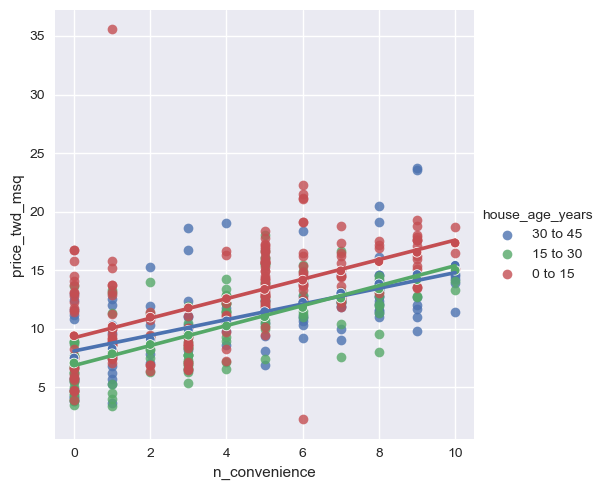

In [63]:
# Plot the trend lines of price_twd_msq vs. n_convenience for each house age category
sns.lmplot(x="n_convenience",
           y="price_twd_msq",
           data=taiwan_real_estate,
           hue="house_age_years",
           ci=None,
           facet_kws={'sharex':False})
# Add a scatter plot for prediction_data
sns.scatterplot(x='n_convenience',y='price_twd_msq',data=prediction_data,hue='house_age_years',
     legend=False)

plt.show()

In [64]:
# Print the coeff. of determination for mdl_all_ages
print("R-squared for mdl_price_vs_age: ", mdl_price_vs_age.rsquared)
print("RSE for mdl_price_vs_age: ", np.sqrt(mdl_price_vs_age.mse_resid))
print('\n')

# Print the coeff. of determination for mdl_0_to_15
print("R-squared for mdl_0_to_15: ", mdl_0_to_15.rsquared)
print("RSE for mdl_0_to_15: ", np.sqrt(mdl_0_to_15.mse_resid))
print('\n')

# Print the coeff. of determination for mdl_15_to_30
print("R-squared for mdl_15_to_30: ", mdl_15_to_30.rsquared)
print("RSE for mdl_15_to_30: ", np.sqrt(mdl_15_to_30.mse_resid))
print('\n')

# Print the coeff. of determination for mdl_30_to_45
print("R-squared for mdl_30_to_45: ", mdl_30_to_45.rsquared)
print("RSE for mdl_30_to_45: ", np.sqrt(mdl_30_to_45.mse_resid))

R-squared for mdl_price_vs_age:  0.08382749316665172
RSE for mdl_price_vs_age:  3.950183875630859


R-squared for mdl_0_to_15:  0.3120536339435178
RSE for mdl_0_to_15:  3.564126993631971


R-squared for mdl_15_to_30:  0.4424604869682425
RSE for mdl_15_to_30:  2.585272870907339


R-squared for mdl_30_to_45:  0.3125713334387281
RSE for mdl_30_to_45:  3.239037479434981


We can see that Rsquared improved in all the individual models. While RSE or residual sum of errors improved only in the houses with ages between 15-30. The phenomenon of individual dataset models performing better than combined datasets is also known as the Simpson's Paradox. 

**Simpsom's Paradox**

Simpson's Paradox is a phenomenon in probability and statistics, in which a trend appears in several different groups of data but disappears or reverses when these groups are combined. It is also known as the Yule-Simpson effect. It is named after the statistician E. H. Simpson and the mathematician William Sealy Gosset, who first described it in 1951. The paradox was first described by the statistician John W. Tukey in 1955. Simpsons Paradox is also known as the Yule-Simpson effect.

#### Models with interaction terms

In [65]:
# Model price vs. both with an interaction using "colon" syntax
mdl_price_vs_both_inter = ols("price_twd_msq ~ house_age_years +  house_age_years:n_convenience + 0", data=taiwan_real_estate).fit()

# Print the coefficients
print(mdl_price_vs_both_inter.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     53.99
Date:                Sat, 18 Mar 2023   Prob (F-statistic):           5.75e-43
Time:                        15:51:37   Log-Likelihood:                -1067.7
No. Observations:                 414   AIC:                             2147.
Df Residuals:                     408   BIC:                             2172.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [66]:
# Print the coefficients for mdl_0_to_15
print("mdl_0_to_15 coefficients:", "\n", mdl_0_to_15.params,'\n')

# Print the coefficients for mdl_15_to_30
print("mdl_15_to_30 coefficients:", "\n", mdl_15_to_30.params,'\n')

# Print the coefficients for mdl_30_to_45
print("mdl_30_to_45 coefficients:", "\n", mdl_30_to_45.params)

# Print the coefficients for mdl_readable_inter
print("\n", "mdl_price_vs_both_inter coefficients:", "\n", mdl_price_vs_both_inter.params)

mdl_0_to_15 coefficients: 
 Intercept        9.241702
n_convenience    0.833587
dtype: float64 

mdl_15_to_30 coefficients: 
 Intercept        6.871919
n_convenience    0.851917
dtype: float64 

mdl_30_to_45 coefficients: 
 Intercept        8.113123
n_convenience    0.668698
dtype: float64

 mdl_price_vs_both_inter coefficients: 
 house_age_years[0 to 15]                   9.241702
house_age_years[15 to 30]                  6.871919
house_age_years[30 to 45]                  8.113123
house_age_years[0 to 15]:n_convenience     0.833587
house_age_years[15 to 30]:n_convenience    0.851917
house_age_years[30 to 45]:n_convenience    0.668698
dtype: float64


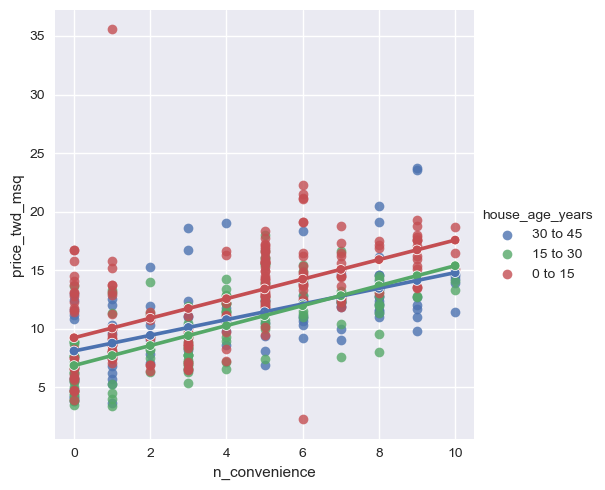

In [67]:
# Making predictions with the interaction model

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)
# Extract the unique values of house_age_years
house_age_years = taiwan_real_estate['house_age_years'].unique()
# Create p as all combinations of values of n_convenience and house_age_years
p = it.product(n_convenience, house_age_years)
# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns = ['n_convenience', 'house_age_years'])
# Add predictions to the DataFrame
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_both_inter.predict(explanatory_data))

# Plot the trend lines of price_twd_msq vs. n_convenience colored by house_age_years
sns.lmplot(x='n_convenience',y='price_twd_msq',data=taiwan_real_estate,hue='house_age_years',ci=False)

# Add a scatter plot for prediction_data
sns.scatterplot(x='n_convenience',y='price_twd_msq',data=prediction_data,hue='house_age_years',
     legend=False)

# Show the plot
plt.show()

In [68]:
# Get the coefficients from mdl_price_vs_both_inter
coeffs = mdl_price_vs_both_inter.params

# Assign each of the elements of coeffs
ic_0_15, ic_15_30, ic_30_45, slope_0_15, slope_15_30, slope_30_45 = coeffs

# Create conditions
conditions = [
    explanatory_data['house_age_years'] == "0 to 15",
    explanatory_data['house_age_years'] == "15 to 30",
    explanatory_data['house_age_years'] == "30 to 45"]
# Create intercept_choices
intercept_choices = [ic_0_15, ic_15_30, ic_30_45]
# Create slope_choices
slope_choices = [slope_0_15, slope_15_30, slope_30_45]

# Create intercept and slope
intercept = np.select(conditions, intercept_choices)
slope = np.select(conditions, slope_choices)
# Create prediction_data with columns intercept and price_twd_msq
prediction_data = explanatory_data.assign(price_twd_msq = intercept + slope * explanatory_data['n_convenience'])
# Print it
print(prediction_data)

    n_convenience house_age_years  price_twd_msq
0               0        30 to 45       8.113123
1               0        15 to 30       6.871919
2               0         0 to 15       9.241702
3               1        30 to 45       8.781822
4               1        15 to 30       7.723836
5               1         0 to 15      10.075289
6               2        30 to 45       9.450520
7               2        15 to 30       8.575753
8               2         0 to 15      10.908876
9               3        30 to 45      10.119218
10              3        15 to 30       9.427670
11              3         0 to 15      11.742462
12              4        30 to 45      10.787916
13              4        15 to 30      10.279588
14              4         0 to 15      12.576049
15              5        30 to 45      11.456614
16              5        15 to 30      11.131505
17              5         0 to 15      13.409636
18              6        30 to 45      12.125312
19              6   

#### Using two numerical variables

Lets see how we can use two numerical variables in our model. We will use the same dataset as before

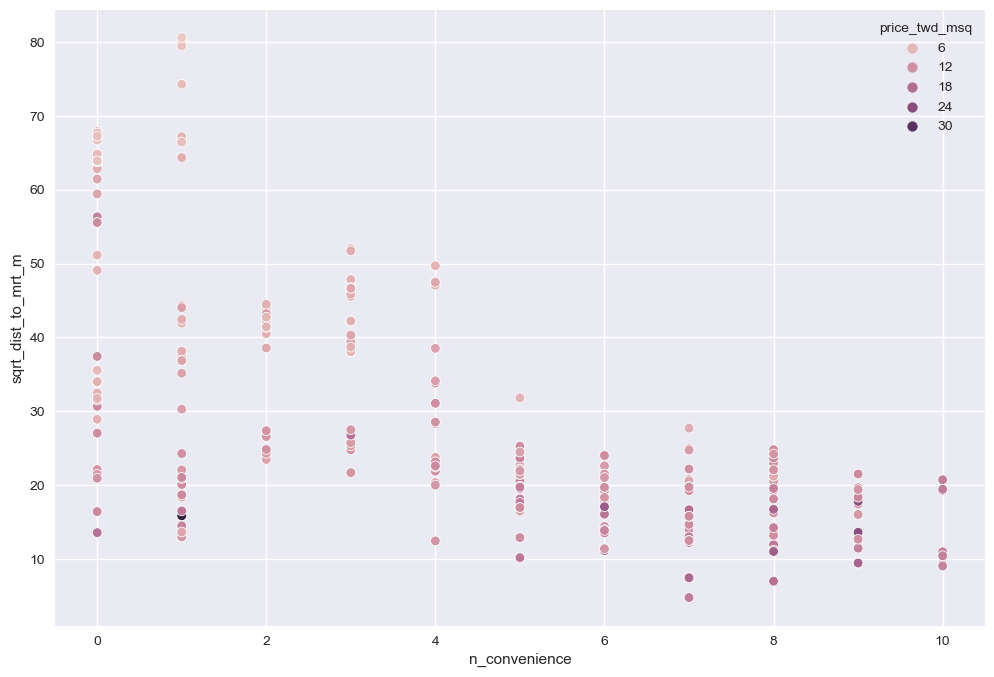

In [70]:
# Transform dist_to_mrt_m to sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
# Draw a scatter plot of sqrt_dist_to_mrt_m vs. n_convenience colored by price_twd_msq
sns.scatterplot(x='n_convenience',y='sqrt_dist_to_mrt_m',data=taiwan_real_estate,hue='price_twd_msq')
# Show the plot
plt.show()

In [73]:
# Fit linear regression of price vs. no. of conv. stores and sqrt dist. to nearest MRT, no interaction
mdl_price_vs_conv_dist = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m",data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_conv_dist.params)

# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)
# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)
# Create p as all combinations of values of n_convenience and sqrt_dist_to_mrt_m
p = it.product(n_convenience, sqrt_dist_to_mrt_m)
# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=['n_convenience','sqrt_dist_to_mrt_m'])
# Add column of predictions
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_conv_dist.predict(explanatory_data))
# See the result  
print(prediction_data)

Intercept             15.103790
n_convenience          0.214221
sqrt_dist_to_mrt_m    -0.157300
dtype: float64
    n_convenience  sqrt_dist_to_mrt_m  price_twd_msq
0               0                   0      15.103790
1               0                  10      13.530787
2               0                  20      11.957784
3               0                  30      10.384781
4               0                  40       8.811778
..            ...                 ...            ...
94             10                  40      10.953984
95             10                  50       9.380981
96             10                  60       7.807978
97             10                  70       6.234975
98             10                  80       4.661972

[99 rows x 3 columns]


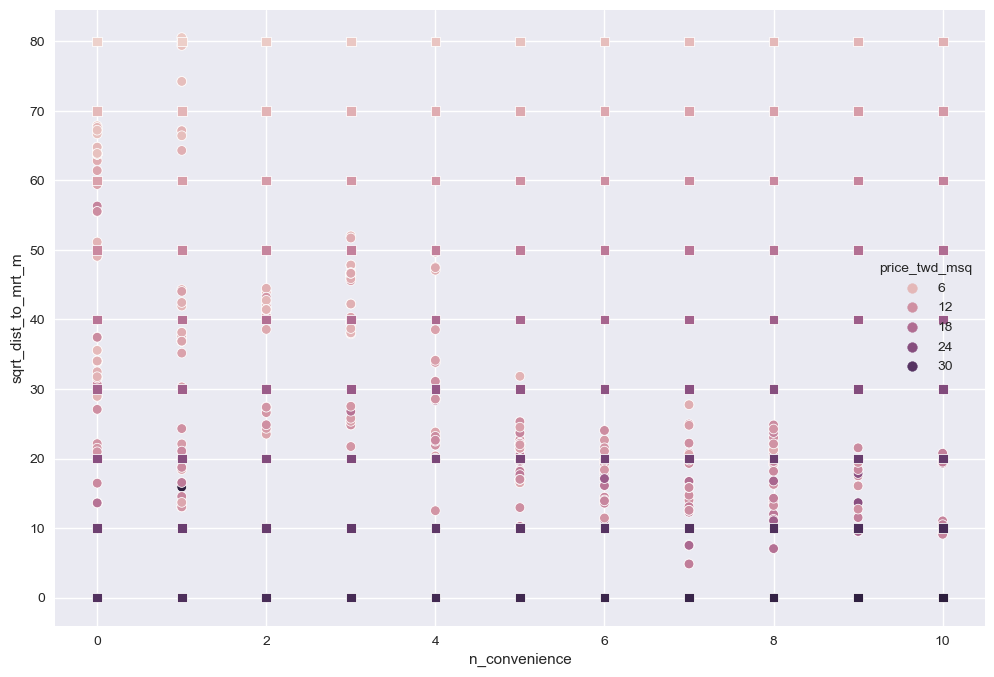

In [75]:
# Create scatter plot of taiwan_real_estate
sns.scatterplot(x='n_convenience',y='sqrt_dist_to_mrt_m',data=taiwan_real_estate,hue='price_twd_msq')
# Create scatter plot of prediction_data without legend
sns.scatterplot(x='n_convenience',y='sqrt_dist_to_mrt_m',hue='price_twd_msq',data=prediction_data,marker='s',legend=False)
# Show the plot
plt.show()

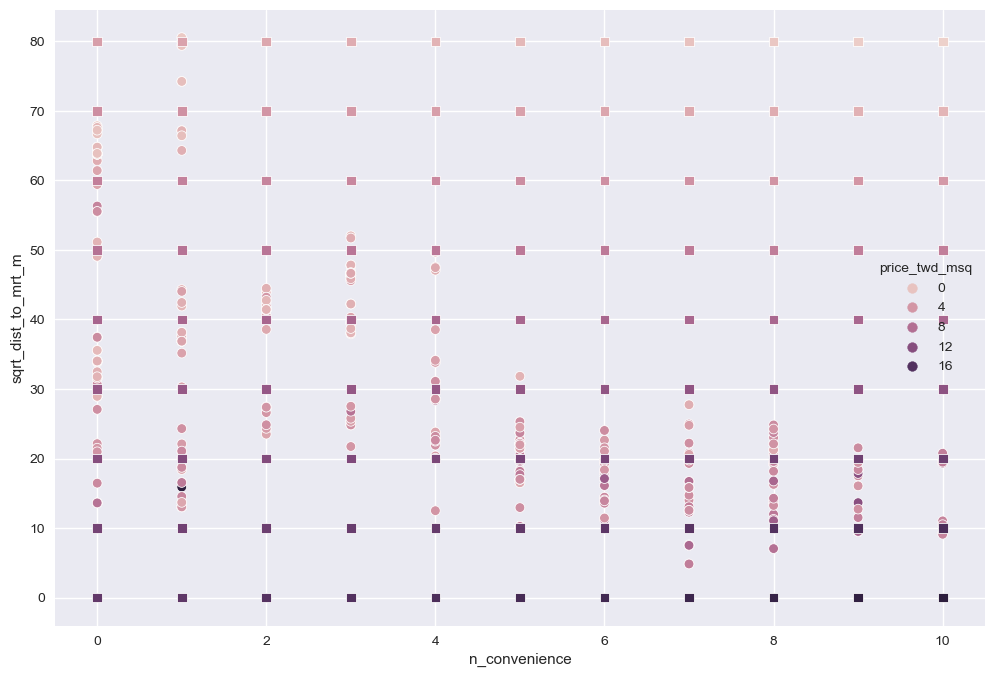

In [77]:
# Convert to mdl_price_vs_conv_dist_inter
mdl_price_vs_conv_dist_inter = ols("price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + n_convenience*sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Use mdl_price_vs_conv_dist_inter to make predictions
n_convenience = np.arange(0, 11)
sqrt_dist_to_mrt_m = np.arange(0, 81, 10)
p = it.product(n_convenience, sqrt_dist_to_mrt_m)
explanatory_data = pd.DataFrame(p, columns=["n_convenience", "sqrt_dist_to_mrt_m"])
prediction_data = explanatory_data.assign(
    price_twd_msq = mdl_price_vs_conv_dist_inter.predict(explanatory_data))

sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=taiwan_real_estate, hue="price_twd_msq", legend=False)
sns.scatterplot(x="n_convenience", y="sqrt_dist_to_mrt_m", data=prediction_data, hue="price_twd_msq", marker="s")
plt.show()

#### Increasing explanatory variables to greater than 2

Lets see how we can use more than two numerical variables in our model. We will use the same dataset as before. 

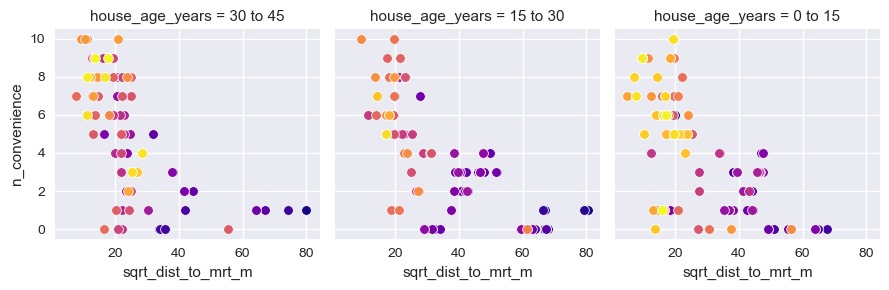

In [78]:
# Prepare the grid using taiwan_real_estate, for each house age category, colored by price_twd_msq
grid = sns.FacetGrid(data=taiwan_real_estate,
            col='house_age_years',
            hue='price_twd_msq',
            palette="plasma")

# Plot the scatterplots with sqrt_dist_to_mrt_m on the x-axis and n_convenience on the y-axis
grid.map(sns.scatterplot,
         'sqrt_dist_to_mrt_m',
         'n_convenience')

# Show the plot (brighter colors mean higher prices)
plt.show()

In [80]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 3-way interactions
mdl_price_vs_all_3_way_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + n_convenience:sqrt_dist_to_mrt_m + n_convenience:house_age_years + sqrt_dist_to_mrt_m:house_age_years + n_convenience:sqrt_dist_to_mrt_m:house_age_years + 0',data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_3_way_inter.params)

house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [86]:
# A shorter way to include all 3-way interactions
mdl_price_vs_all_3_way_inter = ols('price_twd_msq ~ n_convenience * sqrt_dist_to_mrt_m * house_age_years + 0',data=taiwan_real_estate).fit()
print(mdl_price_vs_all_3_way_inter.params)

house_age_years[0 to 15]                                        16.046849
house_age_years[15 to 30]                                       13.760066
house_age_years[30 to 45]                                       12.088773
n_convenience                                                    0.374982
n_convenience:house_age_years[T.15 to 30]                        0.078370
n_convenience:house_age_years[T.30 to 45]                        0.066720
sqrt_dist_to_mrt_m                                              -0.162944
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]                   0.036618
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]                   0.061281
n_convenience:sqrt_dist_to_mrt_m                                -0.008393
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]    -0.003821
n_convenience:sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.004401
dtype: float64


In [81]:
# Model price vs. sqrt dist. to MRT station, no. of conv. stores & house age, no global intercept, 2-way interactions
mdl_price_vs_all_2_way_inter = ols('price_twd_msq ~ n_convenience + sqrt_dist_to_mrt_m + house_age_years + n_convenience:sqrt_dist_to_mrt_m + n_convenience:house_age_years + sqrt_dist_to_mrt_m:house_age_years  + 0',data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience:sqrt_dist_to_mrt_m                  -0.008956
dtype: float64


In [91]:
# A shorter way to include all 2-way interactions
mdl_price_vs_all_2_way_inter = ols('price_twd_msq ~ (n_convenience + sqrt_dist_to_mrt_m + house_age_years) ** 2 + 0',data=taiwan_real_estate).fit()

# See the result
print(mdl_price_vs_all_2_way_inter.params)

house_age_years[0 to 15]                          16.026633
house_age_years[15 to 30]                         13.880791
house_age_years[30 to 45]                         11.926904
n_convenience                                      0.384914
n_convenience:house_age_years[T.15 to 30]         -0.006894
n_convenience:house_age_years[T.30 to 45]          0.143416
sqrt_dist_to_mrt_m                                -0.162025
sqrt_dist_to_mrt_m:house_age_years[T.15 to 30]     0.031600
sqrt_dist_to_mrt_m:house_age_years[T.30 to 45]     0.068198
n_convenience:sqrt_dist_to_mrt_m                  -0.008956
dtype: float64


In [84]:
# Predicting data with the model
# Create n_convenience as an array of numbers from 0 to 10
n_convenience = np.arange(0,11,1)
# Create sqrt_dist_to_mrt_m as an array of numbers from 0 to 80 in steps of 10
sqrt_dist_to_mrt_m = np.arange(0,81,10)
# Create house_age_years with unique values
house_age_years = taiwan_real_estate['house_age_years'].unique()
# Create p as all combinations of n_convenience, sqrt_dist_to_mrt_m, and house_age_years, in that order
p = it.product(n_convenience, sqrt_dist_to_mrt_m, house_age_years)
# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["n_convenience",
                                            "sqrt_dist_to_mrt_m",
                                            "house_age_years"])
# Add column of predictions
prediction_data = explanatory_data.assign( price_twd_msq = mdl_price_vs_all_3_way_inter.predict(explanatory_data))
# See the result
print(prediction_data)

     n_convenience  sqrt_dist_to_mrt_m house_age_years  price_twd_msq
0                0                   0        30 to 45      12.088773
1                0                   0        15 to 30      13.760066
2                0                   0         0 to 15      16.046849
3                0                  10        30 to 45      11.072148
4                0                  10        15 to 30      12.496811
..             ...                 ...             ...            ...
292             10                  70        15 to 30       0.900864
293             10                  70         0 to 15       2.515561
294             10                  80        30 to 45       5.179415
295             10                  80        15 to 30      -1.583811
296             10                  80         0 to 15       0.046831

[297 rows x 4 columns]


#### Multiple Logistic Regression

We worked with logistic regression in the previous section. We can use multiple logistic regression to predict a binary response using multiple predictors. The response is binary. The predictors are continuous, categorical, or a combination of both. The multiple logistic regression model is:

$$logit(p) = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_px_p$$

where $p$ is the probability of the response being 1, $x_1, x_2, ..., x_p$ are the predictors, and $\beta_0, \beta_1, \beta_2, ..., \beta_p$ are the regression coefficients.

In [101]:
# Fit a logistic regression of churn status vs. length of relationship, recency, and an interaction
mdl_churn_vs_both_inter = logit("has_churned ~ time_since_first_purchase + time_since_last_purchase + time_since_first_purchase:time_since_last_purchase", data=churn).fit()
# Print the coefficients
print(mdl_churn_vs_both_inter.params)

Optimization terminated successfully.
         Current function value: 0.649717
         Iterations 5
Intercept                                            -0.150534
time_since_first_purchase                            -0.637642
time_since_last_purchase                              0.423284
time_since_first_purchase:time_since_last_purchase    0.112250
dtype: float64


In [103]:
# Create time_since_first_purchase
time_since_first_purchase = np.arange(-2, 4.1, 0.1)
# Create time_since_last_purchase
time_since_last_purchase = np.arange(-1, 6.1, 0.1)
# Create p as all combinations of values of time_since_first_purchase and time_since_last_purchase
p = it.product(time_since_first_purchase, time_since_last_purchase)
# Transform p to a DataFrame and name the columns
explanatory_data = pd.DataFrame(p, columns=["time_since_first_purchase",
                                            "time_since_last_purchase"])
# Create prediction_data
prediction_data = explanatory_data.assign(has_churned = mdl_churn_vs_both_inter.predict(explanatory_data))
# Create most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])
# See the result
prediction_data.head()

,time_since_first_purchase,time_since_last_purchase,has_churned,most_likely_outcome
0,-2.0,-1.0,0.716256,1.0
1,-2.0,-0.9,0.720279,1.0
2,-2.0,-0.8,0.724266,1.0
3,-2.0,-0.7,0.728218,1.0
4,-2.0,-0.6,0.732134,1.0


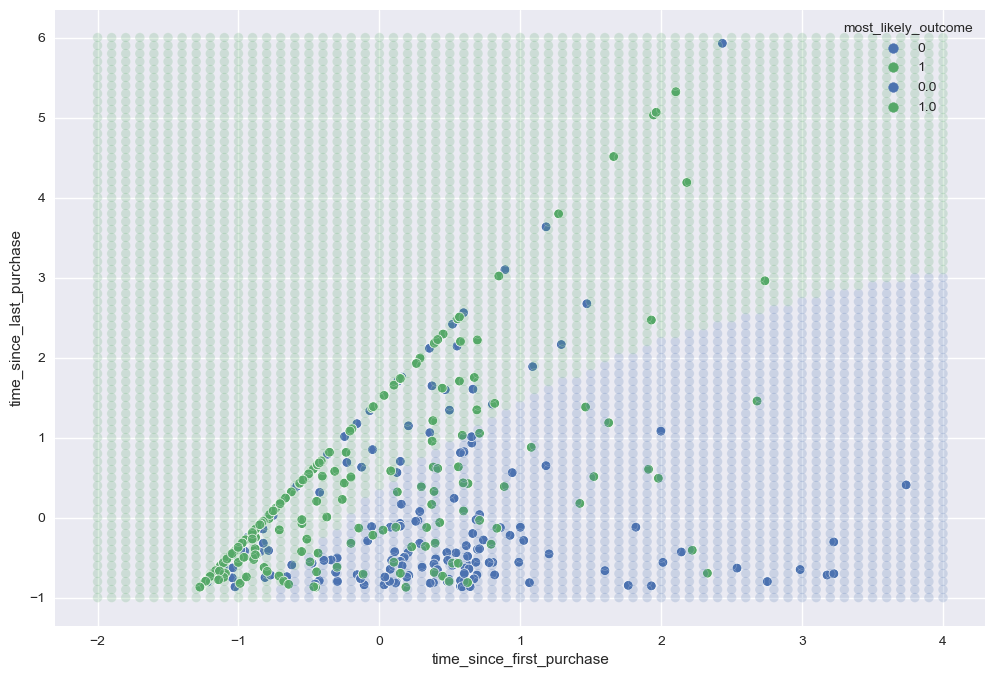

In [105]:
# Using churn, plot recency vs. length of relationship, colored by churn status
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=churn, 
                hue="has_churned")
# Using prediction_data, plot recency vs. length of relationship, colored by most_likely_outcome
sns.scatterplot(x="time_since_first_purchase",
                y="time_since_last_purchase",
                data=prediction_data, 
                hue="most_likely_outcome",
     alpha=0.2,
     legend=True)
# Show the plot
plt.show()

In [108]:
# Create conf_matrix
conf_matrix = mdl_churn_vs_both_inter.pred_table()

TN = conf_matrix[0,0]
FN = conf_matrix[1,0]
TP = conf_matrix[1,1]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + FN + FP + TP)
print("accuracy", accuracy)
# Calculate and print the sensitivity
sensitivity = TP / (TP + FN)
print("sensitivity", sensitivity)
# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity", specificity)

accuracy 0.6225
sensitivity 0.735
specificity 0.51


**Logistic Distribution**

The logistic distribution is a continuous probability distribution. The logistic distribution is also known as the Sech-squared distribution. The logistic distribution is a member of the exponential family of distributions. The logistic distribution is a member of the family of sigmoid curves. The following is the cumulative distribution function of the logistic distribution:

$$F(x) = \frac{1}{1 + e^{-x}}$$

The logistic distribution inverse cumulative distribution function is:

$$F^{-1}(x) = ln(\frac{x}{1 - x})$$ 
or 
$$F^{-1}(x) = -ln(\frac{1 - x}{x})$$

The following is the probability density function of the logistic distribution:

$$f(x) = \frac{e^{-x}}{(1 + e^{-x})^2}$$

True


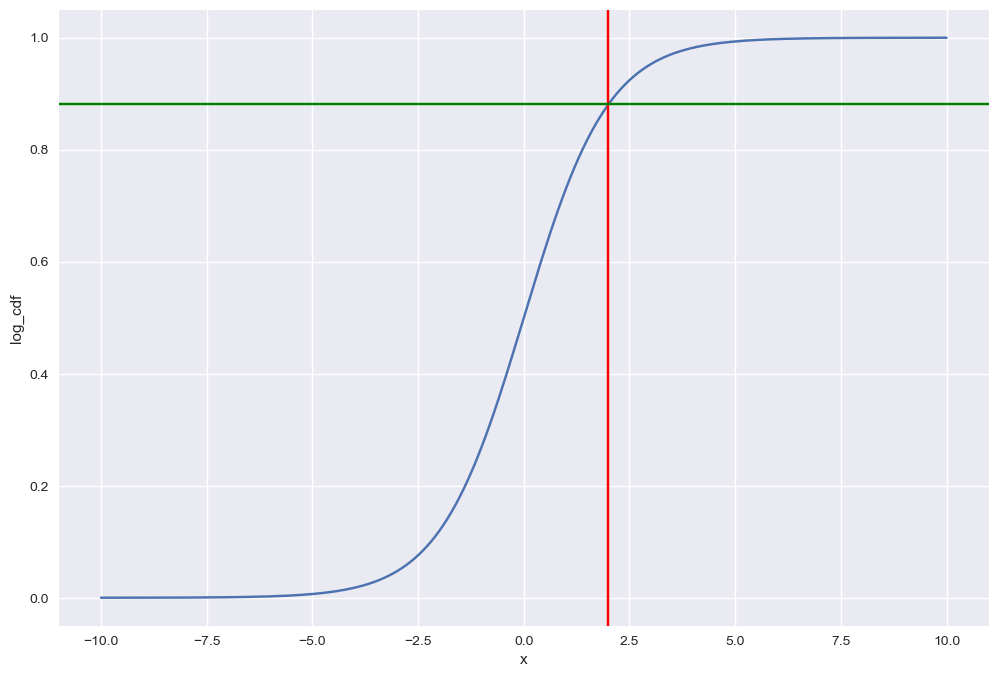

In [123]:
# Create x ranging from minus ten to ten in steps of 0.1
x = np.arange(-10,10.1,0.1)
# Create logistic_dist
logistic_dist = pd.DataFrame({"x": x,
                              "log_cdf": logistic.cdf(x),
                              "log_cdf_man": 1/(1+np.exp(-x))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist["log_cdf"], logistic_dist["log_cdf_man"]))

# Using logistic_dist, plot log_cdf vs. x
sns.lineplot(x="x", y="log_cdf",data=logistic_dist)
plt.axvline(x=2, color='red')
plt.axhline(y=logistic.cdf(2), color='green')

# Show the plot
plt.show()

True


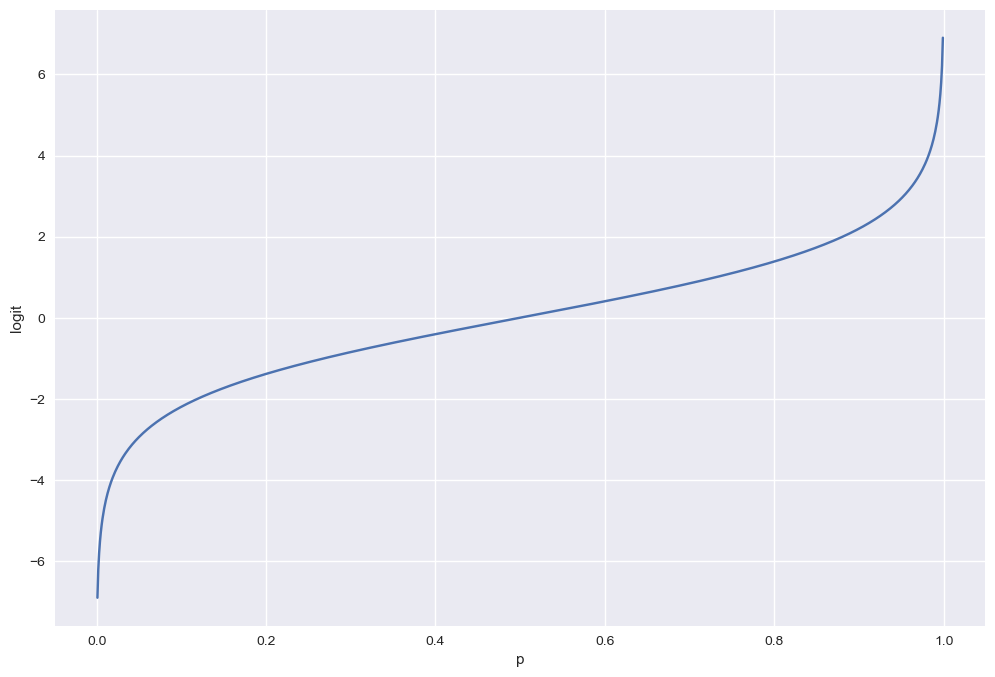

In [128]:
# Create p ranging from 0.001 to 0.999 in steps of 0.001
p = np.arange(0.001,1,0.001)

# Create logistic_dist_inv
logistic_dist_inv = pd.DataFrame({"p": p,
                                  "logit": logistic.ppf(p),
                                  "logit_man": np.log(p/(1-p))})

# Check that each logistic function gives the same results
print(np.array_equal(logistic_dist_inv["logit"], logistic_dist_inv["logit_man"]))

# Using logistic_dist_inv, plot logit vs. p
sns.lineplot(x="p",
             y="logit",
             data=logistic_dist_inv)

# Show the plot
plt.show()

**Likelihood Function**

In logistic regression, the likelihood function represents the probability of observing the given set of outcomes (the response variable) based on the input variables (the predictors). The goal of logistic regression is to estimate the parameters of the model that maximize the likelihood function.

In other words, the likelihood function in logistic regression represents the probability of observing the data given the model parameters. By adjusting the parameters, the model tries to find the best fit to the data. The process of finding the best fit is done by maximizing the likelihood function through an optimization algorithm.

The logistic regression model uses the likelihood function to estimate the probability of an event occurring. The output of logistic regression is a probability value that indicates the likelihood of an event occurring given the input variables. The probability values are then converted into class labels by setting a threshold value. If the probability value is greater than the threshold, the observation is classified as one class, and if the probability value is less than the threshold, the observation is classified as the other class.

The following is the likelihood function for logistic regression:

$$L(\beta_0, \beta_1, ..., \beta_p) = \prod_{i=1}^n p_i^{y_i}(1 - p_i)^{1 - y_i}$$

where $y_i$ is the response for the ith observation, $p_i$ is the predicted probability of the ith observation, and $n$ is the total number of observations.

In [131]:
x_actual = churn['time_since_last_purchase']
y_actual = churn['has_churned']

# Complete the function
def calc_neg_log_likelihood(coeffs):
    # Unpack coeffs
    intercept, slope = coeffs 
    # Calculate predicted y-values
    y_pred = logistic.cdf(intercept + slope * x_actual)
    # Calculate log-likelihood
    log_likelihood = np.log(y_pred) * y_actual + np.log(1 - y_pred) * (1 - y_actual)
    # Calculate negative sum of log_likelihood
    neg_sum_ll = -np.sum(log_likelihood)
    # Return negative sum of log_likelihood
    return neg_sum_ll

# Test the function with intercept 10 and slope 1
print(calc_neg_log_likelihood([10, 1]),'\n')

# Call minimize on calc_sum_of_squares  
print(minimize(fun=calc_neg_log_likelihood,
               x0=[0,0]))

# Compare the output with the logit() call.
print(logit("has_churned ~ time_since_last_purchase", data=churn).fit().params)

1997.9624945172732 

      fun: 273.2001452736106
 hess_inv: array([[ 0.0101836 , -0.00098878],
       [-0.00098878,  0.00962925]])
      jac: array([-7.62939453e-06, -3.81469727e-06])
  message: 'Optimization terminated successfully.'
     nfev: 24
      nit: 5
     njev: 8
   status: 0
  success: True
        x: array([-0.0350195 ,  0.26921495])
Optimization terminated successfully.
         Current function value: 0.683000
         Iterations 4
Intercept                  -0.035019
time_since_last_purchase    0.269215
dtype: float64
